In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
%matplotlib inline

In [5]:
deliveries = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
matches = pd.read_csv("IPL Matches 2008-2020.csv")

In [6]:
deliveries

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [7]:
nattu = deliveries[deliveries['bowler'] == 'T Natarajan']

In [8]:
deliveries.columns


Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [9]:
nattu['ball'].value_counts()

1    76
2    76
3    76
4    76
5    76
6    75
7    15
8     1
Name: ball, dtype: int64

In [10]:
nattu['total_runs'].sum()

636

In [11]:
nattu_economy = 636/(75.85)
nattu_economy

8.384970336189848

In [12]:
nattu['is_wicket'].sum()

21

In [13]:
nattu_avg = 636/21
nattu_avg

30.285714285714285

In [14]:
nattu_strikerate = (75*6+5)/21
nattu_strikerate

21.666666666666668

In [15]:
deliveries_matches = deliveries.merge(matches, how='left', on='id')

In [16]:
deliveries_matches

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [17]:
post_2018 = deliveries_matches[deliveries_matches['date'].str.startswith('2018') | deliveries_matches['date'].str.startswith('2019') | deliveries_matches['date'].str.startswith('2020')]
post_2018

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
150379,1136561,1,7,2,Ishan Kishan,SA Yadav,RA Jadeja,4,0,4,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
150380,1136561,1,7,3,Ishan Kishan,SA Yadav,RA Jadeja,0,0,0,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
150381,1136561,1,7,4,Ishan Kishan,SA Yadav,RA Jadeja,0,0,0,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
150382,1136561,1,7,5,Ishan Kishan,SA Yadav,RA Jadeja,4,0,4,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
150383,1136561,1,7,6,Ishan Kishan,SA Yadav,RA Jadeja,0,0,0,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [18]:
post_2018_death = post_2018[post_2018['over'] > 16]
post_2018_death

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
150517,1136561,1,17,1,HH Pandya,KH Pandya,DJ Bravo,1,0,1,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
150518,1136561,1,17,2,KH Pandya,HH Pandya,DJ Bravo,1,0,1,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
150519,1136561,1,17,3,HH Pandya,KH Pandya,DJ Bravo,1,0,1,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
150520,1136561,1,17,4,KH Pandya,HH Pandya,DJ Bravo,0,0,0,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
150521,1136561,1,17,5,KH Pandya,HH Pandya,DJ Bravo,0,0,0,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193381,1237181,1,19,2,AR Patel,SS Iyer,NM Coulter-Nile,0,0,0,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193382,1237181,1,19,3,SS Iyer,K Rabada,NM Coulter-Nile,0,0,0,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193383,1237181,1,19,4,SS Iyer,K Rabada,NM Coulter-Nile,0,0,0,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193384,1237181,1,19,5,SS Iyer,K Rabada,NM Coulter-Nile,6,0,6,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [19]:
post_2018_death_100_balls = post_2018_death[post_2018_death['batsman'].map(post_2018_death['batsman'].value_counts() > 49)]


In [20]:
post_2018_death_100_balls_batsman = post_2018_death_100_balls.groupby('batsman').sum()
post_2018_death_100_balls_batsman


,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin
batsman,,,,,,,,,,,
AB de Villiers,126587764,147,1886,361,258,10,268,0,8,0,1766.0
AD Russell,163335919,189,2487,512,355,11,366,0,10,0,2123.0
AR Patel,111366699,126,1669,347,145,13,158,0,9,0,2060.0
AT Rayudu,91566124,112,1384,255,105,6,111,0,5,0,963.0
C de Grandhomme,67653013,90,1054,219,81,9,90,0,4,0,1255.0
DJ Bravo,75089789,110,1166,235,121,7,128,0,9,0,1313.0
DJ Hooda,76641589,94,1169,236,103,9,112,0,2,0,402.0
EJG Morgan,76640524,72,1137,232,143,5,148,0,4,0,1723.0
HH Pandya,279503005,284,4233,870,472,31,503,0,16,0,5475.0


In [21]:
post_2018_death_100_balls_batsman['Number Of Balls'] = post_2018_death_100_balls['batsman'].value_counts().sort_index()

In [22]:
post_2018_death_100_balls_batsman

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin,Number Of Balls
batsman,,,,,,,,,,,,
AB de Villiers,126587764,147,1886,361,258,10,268,0,8,0,1766.0,106
AD Russell,163335919,189,2487,512,355,11,366,0,10,0,2123.0,140
AR Patel,111366699,126,1669,347,145,13,158,0,9,0,2060.0,93
AT Rayudu,91566124,112,1384,255,105,6,111,0,5,0,963.0,78
C de Grandhomme,67653013,90,1054,219,81,9,90,0,4,0,1255.0,59
DJ Bravo,75089789,110,1166,235,121,7,128,0,9,0,1313.0,65
DJ Hooda,76641589,94,1169,236,103,9,112,0,2,0,402.0,65
EJG Morgan,76640524,72,1137,232,143,5,148,0,4,0,1723.0,63
HH Pandya,279503005,284,4233,870,472,31,503,0,16,0,5475.0,237


In [23]:
post_2018_death_100_balls_batsman['Dismissals'] = post_2018_death_100_balls['player_dismissed'].value_counts().sort_index()

In [24]:
post_2018_death_100_balls_batsman.drop(columns=['id', 'inning', 'over', 'ball', 'is_wicket', 'neutral_venue', 'result_margin'], inplace=True)

In [25]:
post_2018_death_100_balls_batsman['Average'] = post_2018_death_100_balls_batsman['batsman_runs'] / post_2018_death_100_balls_batsman['Dismissals']
post_2018_death_100_balls_batsman['Strike Rate'] = post_2018_death_100_balls_batsman['batsman_runs'] / post_2018_death_100_balls_batsman['Number Of Balls'] * 100
post_2018_death_100_balls_batsman = post_2018_death_100_balls_batsman.round(decimals=2)
post_2018_death_100_balls_batsman

,batsman_runs,extra_runs,total_runs,non_boundary,Number Of Balls,Dismissals,Average,Strike Rate
batsman,,,,,,,,
AB de Villiers,258,10,268,0,106,8,32.25,243.40
AD Russell,355,11,366,0,140,10,35.50,253.57
AR Patel,145,13,158,0,93,8,18.12,155.91
AT Rayudu,105,6,111,0,78,6,17.50,134.62
C de Grandhomme,81,9,90,0,59,3,27.00,137.29
DJ Bravo,121,7,128,0,65,9,13.44,186.15
DJ Hooda,103,9,112,0,65,2,51.50,158.46
EJG Morgan,143,5,148,0,63,4,35.75,226.98
HH Pandya,472,31,503,0,237,16,29.50,199.16


In [26]:
post_2018_death_100_balls_batsman.reset_index(inplace=True)

<AxesSubplot:xlabel='Strike Rate', ylabel='Average'>

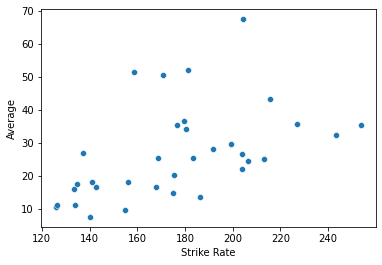

In [27]:
sns.scatterplot(x="Strike Rate", y="Average", data=post_2018_death_100_balls_batsman)

In [28]:
post_2018_death_100_balls_batsman.iplot(x='Strike Rate', y='Average', kind='scatter',color='violet', theme='solar', mode='markers', size=8, text='batsman', title='Death Overs(17-20) averages and strike rates for batsmen from IPL 2018-2020', xTitle='Strike Rate', yTitle='Average', )

In [29]:
cf.colors.scales() 

In [30]:
deliveries_matches.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen


### Function to extract dataframe containing Powerplay stats of each team

In [31]:
def power_play_batting(batsmen_list, batsmen_over_by_over):
    pp_batting = pd.DataFrame(columns=['batsman', 'balls faced', 'runs', 'dismissals', 'average', 'strike rate'])

    for batsman in batsmen_list:
        balls_faced = 0
        runs_scored = 0
        dismissals = 0

        if 0 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 0)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 0)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 0)]['is_wicket']
        if 1 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 1)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 1)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 1)]['is_wicket']
        if 2 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 2)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 2)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 2)]['is_wicket']
        if 3 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 3)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 3)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 3)]['is_wicket']
        if 4 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 4)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 4)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 4)]['is_wicket']
        if 5 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 5)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 5)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 5)]['is_wicket']

        if(balls_faced > 0):
            if(dismissals > 0):
                average = runs_scored/dismissals
            else:
                average = runs_scored
            strike_rate = runs_scored/balls_faced*100
            pp_batting = pp_batting.append({'batsman':batsman, 'balls faced': balls_faced, 'runs': runs_scored, 'dismissals': dismissals, 'average':average, 'strike rate': strike_rate}, ignore_index=True)

    pp_batting = pp_batting.round(decimals=2)
    return pp_batting

### Function to extract dataframe containing Middle Overs(7-16) stats of each team

In [32]:
def middle_overs1_batting(batsmen_list, batsmen_over_by_over):
    mo1_batting = pd.DataFrame(columns=['batsman', 'balls faced', 'runs', 'dismissals', 'average', 'strike rate'])

    for batsman in batsmen_list:
        balls_faced = 0
        runs_scored = 0
        dismissals = 0

        if 6 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 6)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 6)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 6)]['is_wicket']
        if 7 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 7)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 7)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 7)]['is_wicket']
        if 8 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 8)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 8)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 8)]['is_wicket']
        if 9 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 9)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 9)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 9)]['is_wicket']
        if 10 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 10)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 10)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 10)]['is_wicket']
            
        if(balls_faced > 0):
            if(dismissals > 0):
                average = runs_scored/dismissals
            else:
                average = runs_scored
            strike_rate = runs_scored/balls_faced*100
            mo1_batting = mo1_batting.append({'batsman':batsman, 'balls faced': balls_faced, 'runs': runs_scored, 'dismissals': dismissals, 'average':average, 'strike rate': strike_rate}, ignore_index=True)

    mo1_batting = mo1_batting.round(decimals=2)
    return mo1_batting

def middle_overs2_batting(batsmen_list, batsmen_over_by_over):
    mo2_batting = pd.DataFrame(columns=['batsman', 'balls faced', 'runs', 'dismissals', 'average', 'strike rate'])

    for batsman in batsmen_list:
        balls_faced = 0
        runs_scored = 0
        dismissals = 0
        
        if 11 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 11)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 11)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 11)]['is_wicket']
        if 12 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 12)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 12)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 12)]['is_wicket']
        if 13 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 13)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 13)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 13)]['is_wicket']
        if 14 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 14)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 14)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 14)]['is_wicket']
        if 15 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 15)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 15)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 15)]['is_wicket']

        if(balls_faced > 0):
            if(dismissals > 0):
                average = runs_scored/dismissals
            else:
                average = runs_scored
            strike_rate = runs_scored/balls_faced*100
            mo2_batting = mo2_batting.append({'batsman':batsman, 'balls faced': balls_faced, 'runs': runs_scored, 'dismissals': dismissals, 'average':average, 'strike rate': strike_rate}, ignore_index=True)

    mo2_batting = mo2_batting.round(decimals=2)
    return mo2_batting

### Function to extract dataframe containing Death Overs(17-20) stats or each team

In [33]:
def death_batting(batsmen_list, batsmen_over_by_over):
    d_batting = pd.DataFrame(columns=['batsman', 'balls faced', 'runs', 'dismissals', 'average', 'strike rate'])

    for batsman in batsmen_list:
        balls_faced = 0
        runs_scored = 0
        dismissals = 0

        if 16 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 16)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 16)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 16)]['is_wicket']
        if 17 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 17)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 17)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 17)]['is_wicket']
        if 18 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 18)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 18)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 18)]['is_wicket']
        if 19 in batsmen_over_by_over.loc[batsman].index:
            balls_faced += batsmen_over_by_over.loc[(batsman, 19)]['ball']
            runs_scored += batsmen_over_by_over.loc[(batsman, 19)]['batsman_runs']
            dismissals += batsmen_over_by_over.loc[(batsman, 19)]['is_wicket']

        if(balls_faced > 0):
            if(dismissals > 0):
                average = runs_scored/dismissals
            else:
                average = runs_scored
            strike_rate = runs_scored/balls_faced*100
            d_batting = d_batting.append({'batsman':batsman, 'balls faced': balls_faced, 'runs': runs_scored, 'dismissals': dismissals, 'average':average, 'strike rate': strike_rate}, ignore_index=True)

    d_batting = d_batting.round(decimals=2)
    return d_batting

## CSK Batsmen in Powerplay in IPL 2020

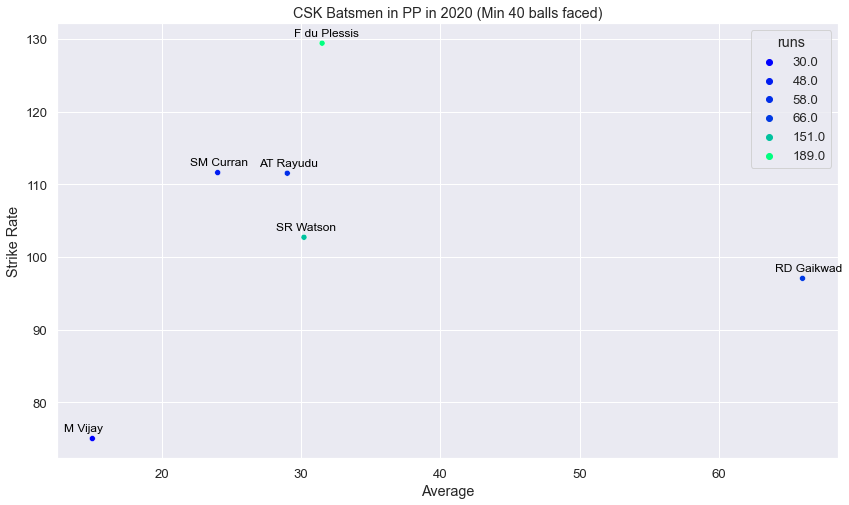

In [34]:
csk2020 = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == 'Chennai Super Kings') | (deliveries_matches['team2'] == 'Chennai Super Kings'))]
csk2020

csk_batsmen_list = ['F du Plessis', 'AT Rayudu', 'SR Watson', 'MS Dhoni', 'RD Gaikwad',
       'SM Curran', 'RA Jadeja', 'KM Jadhav', 'M Vijay', 'N Jagadeesan','SN Thakur', 'DL Chahar', 'Imran Tahir', 'DJ Bravo']

csk2020 = csk2020[csk2020['batsman'].isin(csk_batsmen_list)]

csk2020['ball'] = 1
csk2020

# for i in range(len(csk2020)):
#     if(csk2020.iloc[i]['batsman'] == csk2020.iloc[i]['player_dismissed']):
#         csk2020.iloc[i]['is_wicket'] = 1
#     else:
#         csk2020.iloc[i]['is_wicket'] = 0
    
csk2020

csk_batsmen_over_by_over = csk2020.groupby(['batsman', 'over']).sum()
csk_batsmen_over_by_over.head(25)

csk_powerplay_batting = power_play_batting(csk_batsmen_list, csk_batsmen_over_by_over)
csk_powerplay_batting

csk_powerplay_batting_min_10balls = csk_powerplay_batting[csk_powerplay_batting['balls faced'] > 39]
csk_powerplay_batting_min_10balls.reset_index(inplace=True, drop=True)
csk_powerplay_batting_min_10balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=csk_powerplay_batting_min_10balls, hue='runs', palette='winter')
plt.title("CSK Batsmen in PP in 2020 (Min 40 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,csk_powerplay_batting_min_10balls.shape[0]):
     plt.text(csk_powerplay_batting_min_10balls['average'][line]-2, csk_powerplay_batting_min_10balls['strike rate'][line]+1, csk_powerplay_batting_min_10balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## MI Batsmen in PP in IPL 2020

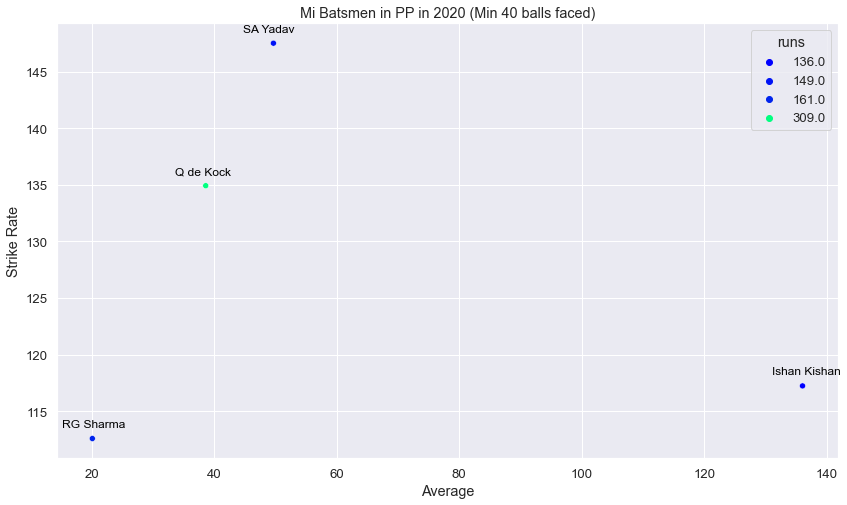

In [35]:
mi2020 = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == 'Mumbai Indians') | (deliveries_matches['team2'] == 'Mumbai Indians'))]
mi2020

mi_batsmen_list = ['Q de Kock', 'Ishan Kishan', 'SA Yadav', 'RG Sharma', 'HH Pandya', 'KA Pollard', 'KH Pandya', 'SS Tiwary']

mi2020 = mi2020[mi2020['batsman'].isin(mi_batsmen_list)]

mi2020['ball'] = 1
mi2020

# for i in range(len(mi2020)):
#     if(mi2020.iloc[i]['batsman'] == mi2020.iloc[i]['player_dismissed']):
#         mi2020.iloc[i]['is_wicket'] = 1
#     else:
#         mi2020.iloc[i]['is_wicket'] = 0
    
mi2020

mi_batsmen_over_by_over = mi2020.groupby(['batsman', 'over']).sum()
mi_batsmen_over_by_over.head(25)

mi_powerplay_batting = power_play_batting(mi_batsmen_list, mi_batsmen_over_by_over)
mi_powerplay_batting

mi_powerplay_batting_min_10balls = mi_powerplay_batting[mi_powerplay_batting['balls faced'] > 39]
mi_powerplay_batting_min_10balls.reset_index(inplace=True, drop=True)
mi_powerplay_batting_min_10balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=mi_powerplay_batting_min_10balls, hue='runs', palette='winter')
plt.title("Mi Batsmen in PP in 2020 (Min 40 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,mi_powerplay_batting_min_10balls.shape[0]):
     plt.text(mi_powerplay_batting_min_10balls['average'][line]-5, mi_powerplay_batting_min_10balls['strike rate'][line]+1, mi_powerplay_batting_min_10balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## RCB Batsmen in PP in IPL 2020

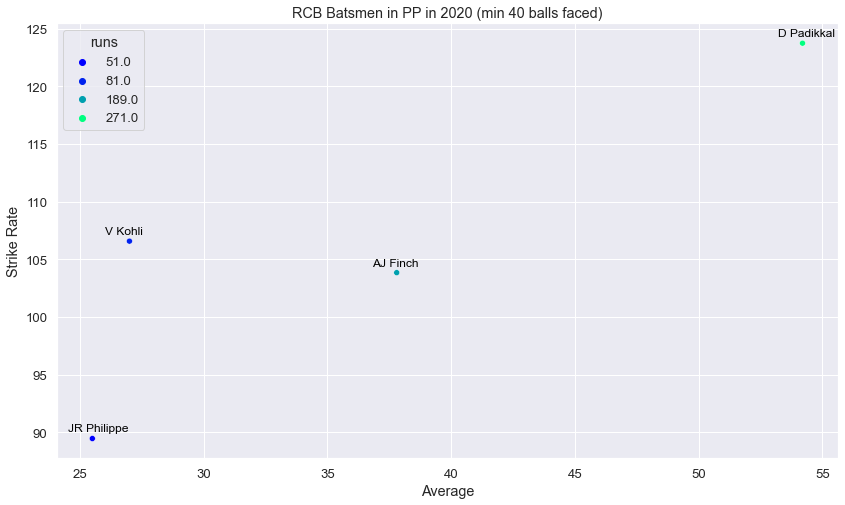

In [36]:
rcb2020 = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == 'Royal Challengers Bangalore') | (deliveries_matches['team2'] == 'Royal Challengers Bangalore'))]
rcb2020

rcb_batsmen_list = ['V Kohli', 'D Padikkal', 'AB de Villiers', 'AJ Finch', 'S Dube', 'Washington Sundar', 'Gurkeerat Singh', 'JR Philippe']

rcb2020 = rcb2020[rcb2020['batsman'].isin(rcb_batsmen_list)]

rcb2020['ball'] = 1
rcb2020

# for i in range(len(rcb2020)):
#     if(rcb2020.iloc[i]['batsman'] == rcb2020.iloc[i]['player_dismissed']):
#         rcb2020.iloc[i]['is_wicket'] = 1
#     else:
#         rcb2020.iloc[i]['is_wicket'] = 0
    
rcb2020

rcb_batsmen_over_by_over = rcb2020.groupby(['batsman', 'over']).sum()
rcb_batsmen_over_by_over.head(25)

rcb_powerplay_batting = power_play_batting(rcb_batsmen_list, rcb_batsmen_over_by_over)
rcb_powerplay_batting

rcb_powerplay_batting_min_10balls = rcb_powerplay_batting[rcb_powerplay_batting['balls faced'] > 39]
rcb_powerplay_batting_min_10balls.reset_index(inplace=True, drop=True)
rcb_powerplay_batting_min_10balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=rcb_powerplay_batting_min_10balls, hue='runs', palette='winter')
plt.title("RCB Batsmen in PP in 2020 (min 40 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,rcb_powerplay_batting_min_10balls.shape[0]):
     plt.text(rcb_powerplay_batting_min_10balls['average'][line]-1, rcb_powerplay_batting_min_10balls['strike rate'][line]+0.6, rcb_powerplay_batting_min_10balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## KKR Batsmen in PP in IPL 2020

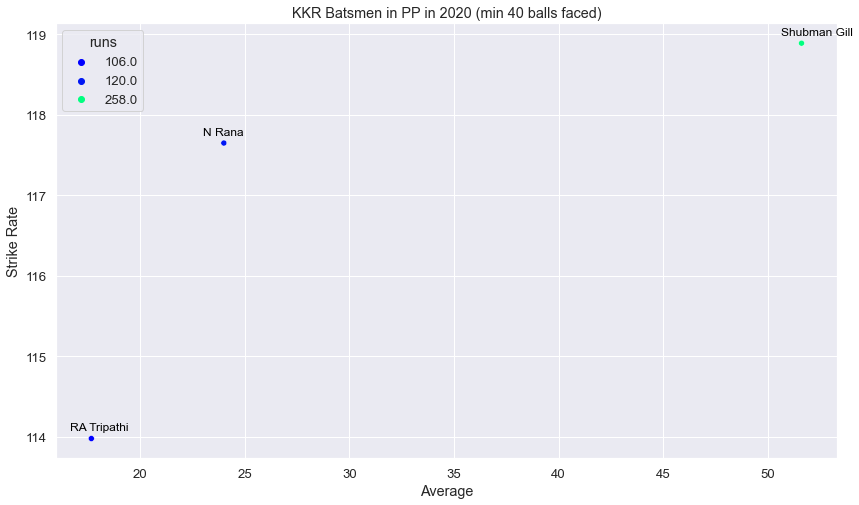

In [37]:
kkr2020 = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == 'Kolkata Knight Riders') | (deliveries_matches['team2'] == 'Kolkata Knight Riders'))]
kkr2020

kkr_batsmen_list = ['Shubman Gill', 'EJG Morgan', 'N Rana', 'RA Tripathi', 'KD Karthik', 'PJ Cummins', 'SP Narine', 'AD Russell']

kkr2020 = kkr2020[kkr2020['batsman'].isin(kkr_batsmen_list)]

kkr2020['ball'] = 1
kkr2020

# for i in range(len(kkr2020)):
#     if(kkr2020.iloc[i]['batsman'] == kkr2020.iloc[i]['player_dismissed']):
#         kkr2020.iloc[i]['is_wicket'] = 1
#     else:
#         kkr2020.iloc[i]['is_wicket'] = 0
    
kkr2020

kkr_batsmen_over_by_over = kkr2020.groupby(['batsman', 'over']).sum()
kkr_batsmen_over_by_over.head(25)

kkr_powerplay_batting = power_play_batting(kkr_batsmen_list, kkr_batsmen_over_by_over)
kkr_powerplay_batting

kkr_powerplay_batting_min_10balls = kkr_powerplay_batting[kkr_powerplay_batting['balls faced'] > 39]
kkr_powerplay_batting_min_10balls.reset_index(inplace=True, drop=True)
kkr_powerplay_batting_min_10balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=kkr_powerplay_batting_min_10balls, hue='runs', palette='winter')
plt.title("KKR Batsmen in PP in 2020 (min 40 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,kkr_powerplay_batting_min_10balls.shape[0]):
     plt.text(kkr_powerplay_batting_min_10balls['average'][line]-1, kkr_powerplay_batting_min_10balls['strike rate'][line]+0.1, kkr_powerplay_batting_min_10balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## DC Batsmen in PP in IPL 2020

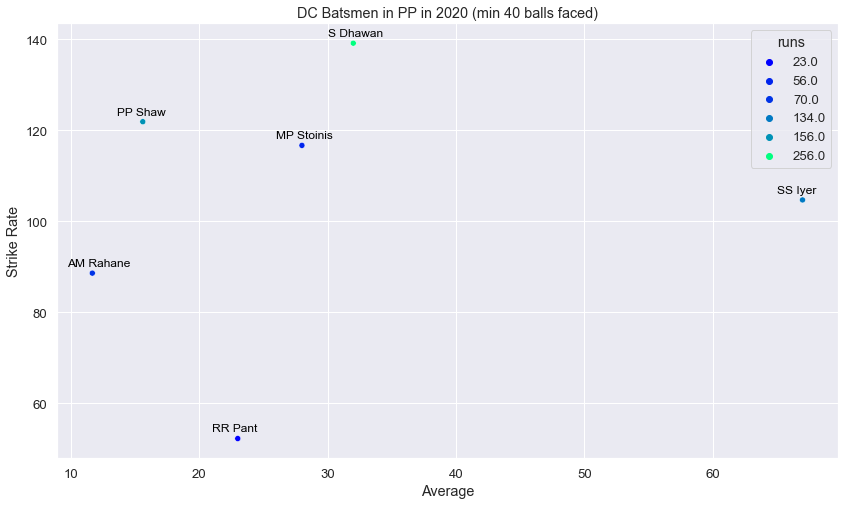

In [38]:
dc2020 = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == 'Delhi Capitals') | (deliveries_matches['team2'] == 'Delhi Capitals'))]
dc2020

dc_batsmen_list = ['S Dhawan', 'SS Iyer', 'RR Pant', 'MP Stoinis', 'PP Shaw', 'SO Hetmyer', 'AM Rahane','AR Patel']
dc2020 = dc2020[dc2020['batsman'].isin(dc_batsmen_list)]

dc2020['ball'] = 1
dc2020

# for i in range(len(dc2020)):
#     if(dc2020.iloc[i]['batsman'] == dc2020.iloc[i]['player_dismissed']):
#         dc2020.iloc[i]['is_wicket'] = 1
#     else:
#         dc2020.iloc[i]['is_wicket'] = 0
    
dc2020

dc_batsmen_over_by_over = dc2020.groupby(['batsman', 'over']).sum()
dc_batsmen_over_by_over.head(25)

dc_powerplay_batting = power_play_batting(dc_batsmen_list, dc_batsmen_over_by_over)
dc_powerplay_batting

dc_powerplay_batting_min_10balls = dc_powerplay_batting[dc_powerplay_batting['balls faced'] > 39]
dc_powerplay_batting_min_10balls.reset_index(inplace=True, drop=True)
dc_powerplay_batting_min_10balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=dc_powerplay_batting_min_10balls, hue='runs', palette='winter')
plt.title("DC Batsmen in PP in 2020 (min 40 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,dc_powerplay_batting_min_10balls.shape[0]):
     plt.text(dc_powerplay_batting_min_10balls['average'][line]-2, dc_powerplay_batting_min_10balls['strike rate'][line]+1.5, dc_powerplay_batting_min_10balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## RR Batsmen in PP in IPL 2020

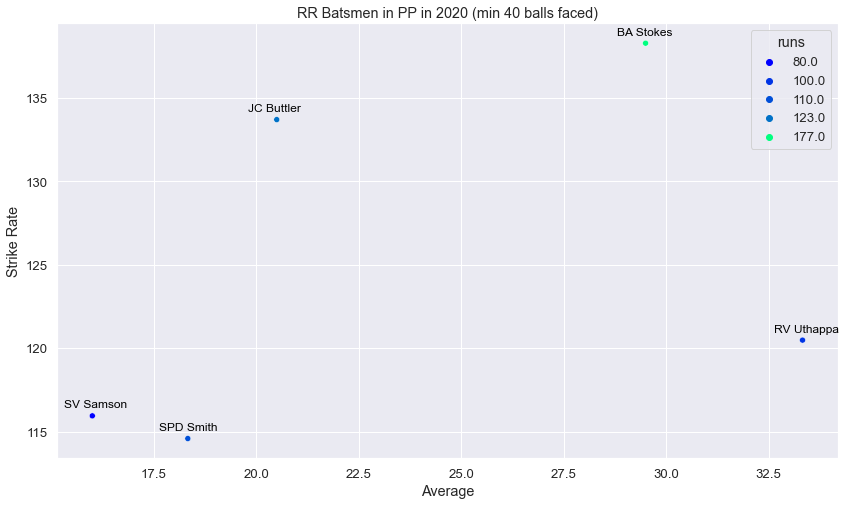

In [39]:
rr2020 = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == 'Rajasthan Royals') | (deliveries_matches['team2'] == 'Rajasthan Royals'))]
rr2020

rr_batsmen_list = ['SPD Smith', 'SV Samson', 'JC Buttler', 'BA Stokes', 'R Tewatia', 'RV Uthappa','R Parag', 'JC Archer','MK Lomror','TK Curran','YBK Jaiswal','S Gopal']
rr2020 = rr2020[rr2020['batsman'].isin(rr_batsmen_list)]

rr2020['ball'] = 1
rr2020

# for i in range(len(rr2020)):
#     if(rr2020.iloc[i]['batsman'] == rr2020.iloc[i]['player_dismissed']):
#         rr2020.iloc[i]['is_wicket'] = 1
#     else:
#         rr2020.iloc[i]['is_wicket'] = 0
    
rr2020

rr_batsmen_over_by_over = rr2020.groupby(['batsman', 'over']).sum()
rr_batsmen_over_by_over.head(25)

rr_powerplay_batting = power_play_batting(rr_batsmen_list, rr_batsmen_over_by_over)
rr_powerplay_batting

rr_powerplay_batting_min_10balls = rr_powerplay_batting[rr_powerplay_batting['balls faced'] > 39]
rr_powerplay_batting_min_10balls.reset_index(inplace=True, drop=True)
rr_powerplay_batting_min_10balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=rr_powerplay_batting_min_10balls, hue='runs', palette='winter')
plt.title("RR Batsmen in PP in 2020 (min 40 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,rr_powerplay_batting_min_10balls.shape[0]):
     plt.text(rr_powerplay_batting_min_10balls['average'][line]-0.7, rr_powerplay_batting_min_10balls['strike rate'][line]+.5, rr_powerplay_batting_min_10balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## KXIP Batsmen in PP in IPL 2020

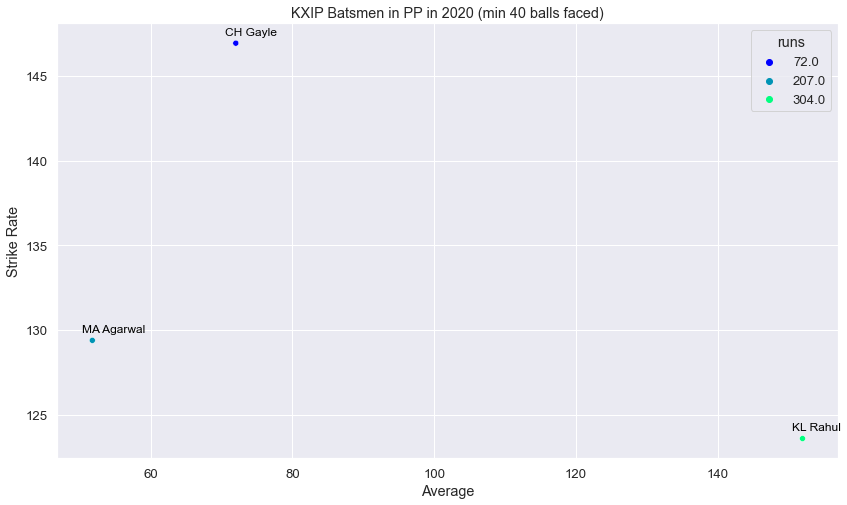

In [40]:
kxip2020 = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == 'Kings XI Punjab') | (deliveries_matches['team2'] == 'Kings XI Punjab'))]
kxip2020

kxip_batsmen_list = ['KL Rahul', 'MA Agarwal', 'CH Gayle', 'N Pooran', 'GJ Maxwell','Mandeep Singh', 'DJ Hooda']
kxip2020 = kxip2020[kxip2020['batsman'].isin(kxip_batsmen_list)]

kxip2020['ball'] = 1
kxip2020

# for i in range(len(kxip2020)):
#     if(kxip2020.iloc[i]['batsman'] == kxip2020.iloc[i]['player_dismissed']):
#         kxip2020.iloc[i]['is_wicket'] = 1
#     else:
#         kxip2020.iloc[i]['is_wicket'] = 0
    
kxip2020

kxip_batsmen_over_by_over = kxip2020.groupby(['batsman', 'over']).sum()
kxip_batsmen_over_by_over.head(25)

kxip_powerplay_batting = power_play_batting(kxip_batsmen_list, kxip_batsmen_over_by_over)
kxip_powerplay_batting

kxip_powerplay_batting_min_10balls = kxip_powerplay_batting[kxip_powerplay_batting['balls faced'] > 39]
kxip_powerplay_batting_min_10balls.reset_index(inplace=True, drop=True)
kxip_powerplay_batting_min_10balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=kxip_powerplay_batting_min_10balls, hue='runs', palette='winter')
plt.title("KXIP Batsmen in PP in 2020 (min 40 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,kxip_powerplay_batting_min_10balls.shape[0]):
     plt.text(kxip_powerplay_batting_min_10balls['average'][line]-1.5, kxip_powerplay_batting_min_10balls['strike rate'][line]+.5, kxip_powerplay_batting_min_10balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## SRH Batsmen in PP in IPL 2020

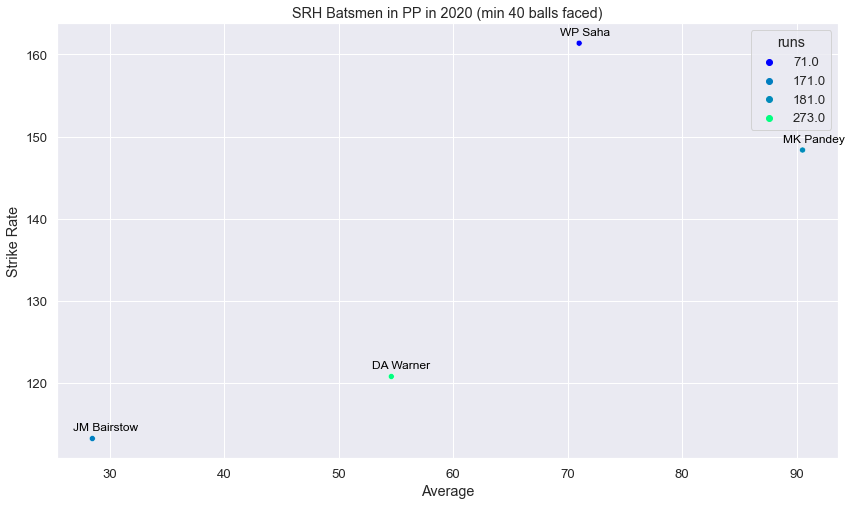

In [41]:
srh2020 = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == 'Sunrisers Hyderabad') | (deliveries_matches['team2'] == 'Sunrisers Hyderabad'))]
srh2020

srh_batsmen_list = ['DA Warner', 'MK Pandey', 'JM Bairstow', 'KS Williamson', 'WP Saha','PK Garg', 'V Shankar', 'Abdul Samad', 'Abhishek Sharma', 'JO Holder']
srh2020 = srh2020[srh2020['batsman'].isin(srh_batsmen_list)]

srh2020['ball'] = 1
srh2020

# for i in range(len(srh2020)):
#     if(srh2020.iloc[i]['batsman'] == srh2020.iloc[i]['player_dismissed']):
#         srh2020.iloc[i]['is_wicket'] = 1
#     else:
#         srh2020.iloc[i]['is_wicket'] = 0
    
srh2020

srh_batsmen_over_by_over = srh2020.groupby(['batsman', 'over']).sum()
srh_batsmen_over_by_over.head(25)

srh_powerplay_batting = power_play_batting(srh_batsmen_list, srh_batsmen_over_by_over)
srh_powerplay_batting

srh_powerplay_batting_min_10balls = srh_powerplay_batting[srh_powerplay_batting['balls faced'] > 39]
srh_powerplay_batting_min_10balls.reset_index(inplace=True, drop=True)
srh_powerplay_batting_min_10balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=srh_powerplay_batting_min_10balls, hue='runs', palette='winter')
plt.title("SRH Batsmen in PP in 2020 (min 40 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,srh_powerplay_batting_min_10balls.shape[0]):
     plt.text(srh_powerplay_batting_min_10balls['average'][line]-1.7, srh_powerplay_batting_min_10balls['strike rate'][line]+1, srh_powerplay_batting_min_10balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


In [42]:
best_batsmen_in_PP_for_each_team = ['WP Saha', 'MK Pandey', 'CH Gayle', 'KL Rahul', 'RV Uthappa', 'BA Stokes', 'SS Iyer', 'S Dhawan', 'Shubman Gill', 'D Padikkal', 'SA Yadav', 'Ishan Kishan', 'RD Gaikwad', 'F du Plessis']


## Batsmen in PP in IPL 2020

In [43]:
ipl2020 = deliveries_matches[deliveries_matches['date'].str.startswith('2020')]
ipl2020['ball'] = 1
ipl2020

batsmen_over_by_over = ipl2020.groupby(['batsman', 'over']).sum()
batsmen_over_by_over

ipl2020_powerplay_batting = power_play_batting(ipl2020['batsman'].value_counts().index, batsmen_over_by_over)
ipl2020_powerplay_batting

ipl2020_powerplay_batting_min_40_balls = ipl2020_powerplay_batting[ipl2020_powerplay_batting['balls faced'] > 39]
ipl2020_powerplay_batting_min_40_balls.reset_index(inplace=True, drop=True)
ipl2020_powerplay_batting_min_40_balls = ipl2020_powerplay_batting_min_40_balls[ipl2020_powerplay_batting_min_40_balls['batsman'].isin(best_batsmen_in_PP_for_each_team)]

In [44]:
ipl2020_powerplay_batting_min_40_balls.reset_index(drop=True, inplace=True)
ipl2020_powerplay_batting_min_40_balls['Team'] = ['Kings XI Punjab' , 'Delhi Capitals', 'Delhi Capitals', 'Royal Challengers Bangalore', 'Kolkata Knight Riders','Mumbai Indians', 'Sunrisers Hyderabad', 'Mumbai Indians', 'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals', 'Chennai Super Kings', 'Rajasthan Royals', 'Sunrisers Hyderabad']
ipl2020_powerplay_batting_min_40_balls

,batsman,balls faced,runs,dismissals,average,strike rate,Team
0,KL Rahul,246.0,304.0,2.0,152.00,123.58,Kings XI Punjab
1,SS Iyer,128.0,134.0,2.0,67.00,104.69,Delhi Capitals
2,S Dhawan,184.0,256.0,8.0,32.00,139.13,Delhi Capitals
3,D Padikkal,219.0,271.0,5.0,54.20,123.74,Royal Challengers Bangalore
4,Shubman Gill,217.0,258.0,5.0,51.60,118.89,Kolkata Knight Riders
5,Ishan Kishan,116.0,136.0,1.0,136.00,117.24,Mumbai Indians
6,MK Pandey,122.0,181.0,2.0,90.50,148.36,Sunrisers Hyderabad
7,SA Yadav,101.0,149.0,3.0,49.67,147.52,Mumbai Indians
8,F du Plessis,146.0,189.0,6.0,31.50,129.45,Chennai Super Kings
9,CH Gayle,49.0,72.0,1.0,72.00,146.94,Kings XI Punjab


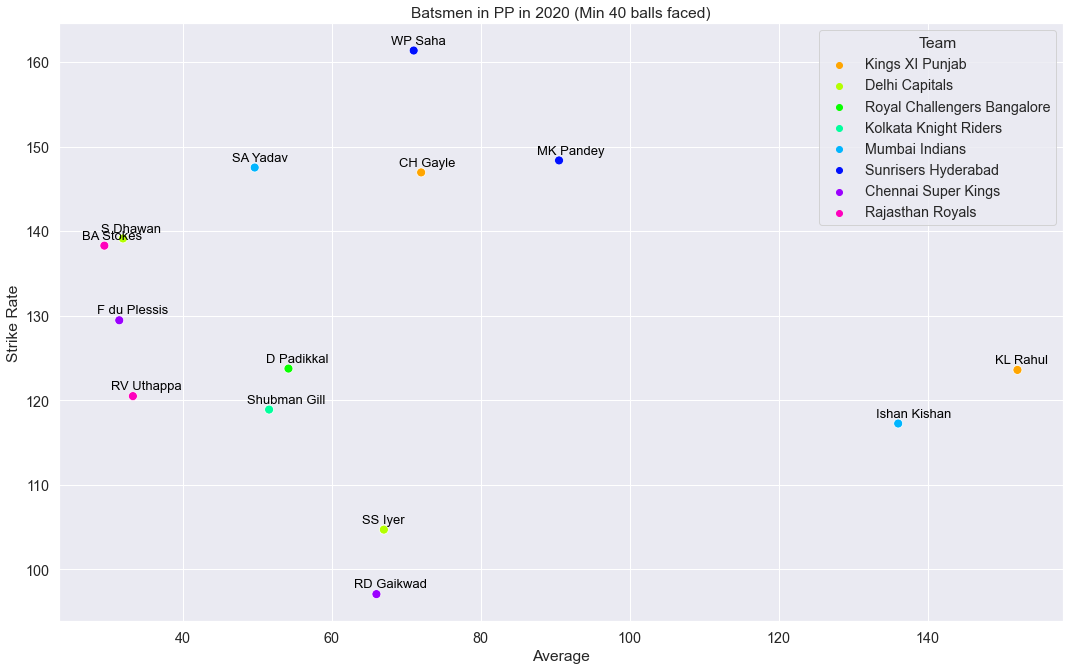

In [45]:
plt.figure(figsize=(18,11))
sns.set(font_scale=1.3)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=ipl2020_powerplay_batting_min_40_balls, hue='Team', palette='hsv', s=80)
plt.title("Batsmen in PP in 2020 (Min 40 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,ipl2020_powerplay_batting_min_40_balls.shape[0]):
     plt.text(ipl2020_powerplay_batting_min_40_balls['average'][line]-3, ipl2020_powerplay_batting_min_40_balls['strike rate'][line]+0.8, ipl2020_powerplay_batting_min_40_balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## CSK Batsmen in Post PP Overs (7-11) in IPL 2020

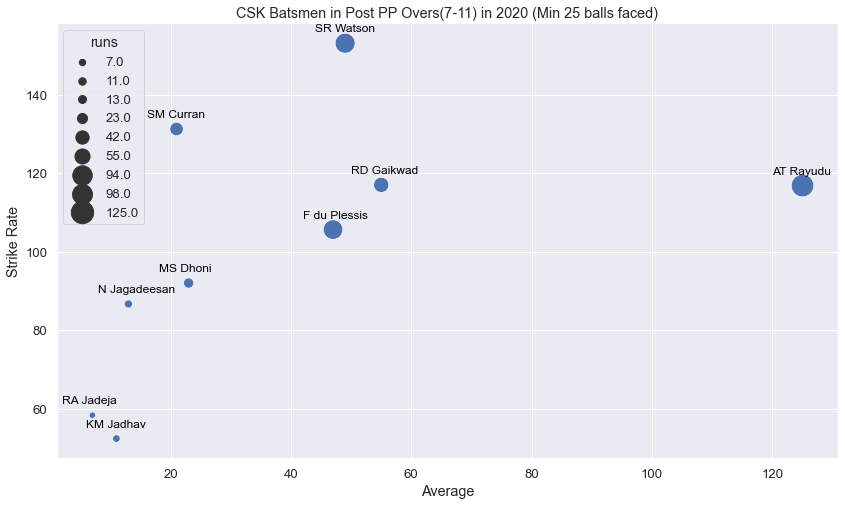

In [46]:
# csk2020_mid1 = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == 'Chennai Super Kings') | (deliveries_matches['team2'] == 'Chennai Super Kings'))]
# csk2020_mid1

# csk_batsmen_list = ['F du Plessis', 'AT Rayudu', 'SR Watson', 'MS Dhoni', 'RD Gaikwad',
#        'SM Curran', 'RA Jadeja', 'KM Jadhav', 'M Vijay', 'N Jagadeesan','SN Thakur', 'DL Chahar', 'Imran Tahir', 'DJ Bravo']

# csk2020 = csk2020[csk2020['batsman'].isin(csk_batsmen_list)]

# csk2020['ball'] = 1
# csk2020

# # for i in range(len(csk2020)):
# #     if(csk2020.iloc[i]['batsman'] == csk2020.iloc[i]['player_dismissed']):
# #         csk2020.iloc[i]['is_wicket'] = 1
# #     else:
# #         csk2020.iloc[i]['is_wicket'] = 0
    
# csk2020

# csk_batsmen_over_by_over = csk2020.groupby(['batsman', 'over']).sum()
# csk_batsmen_over_by_over.head(25)

csk_mid1_batting = middle_overs1_batting(csk_batsmen_list, csk_batsmen_over_by_over)
csk_mid1_batting

csk_mid1_batting_min_25balls = csk_mid1_batting[csk_mid1_batting['balls faced'] > 9]
csk_mid1_batting_min_25balls.reset_index(inplace=True, drop=True)
csk_mid1_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=csk_mid1_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', palette='winter')
plt.title("CSK Batsmen in Post PP Overs(7-11) in 2020 (Min 25 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,csk_mid1_batting_min_25balls.shape[0]):
     plt.text(csk_mid1_batting_min_25balls['average'][line]-5, csk_mid1_batting_min_25balls['strike rate'][line]+3, csk_mid1_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## MI Batsmen in Post PP Overs (7-11) in IPL2020

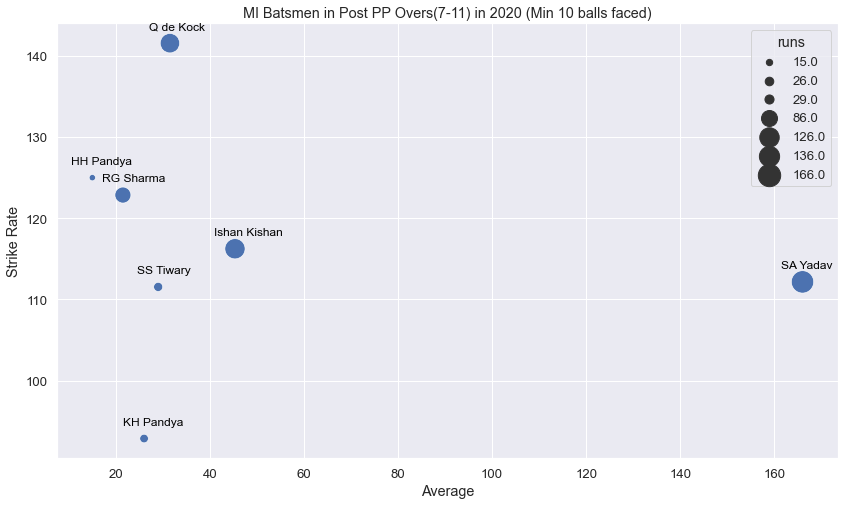

In [47]:
mi2020_mid1 = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == 'Mumbai Indians') | (deliveries_matches['team2'] == 'Mumbai Indians'))]
mi2020_mid1

# mi_batsmen_list = ['F du Plessis', 'AT Rayudu', 'SR Watson', 'MS Dhoni', 'RD Gaikwad',
#        'SM Curran', 'RA Jadeja', 'KM Jadhav', 'M Vijay', 'N Jagadeesan','SN Thakur', 'DL Chahar', 'Imran Tahir', 'DJ Bravo']

mi2020_mid1 = mi2020_mid1[mi2020_mid1['batsman'].isin(mi_batsmen_list)]

mi2020_mid1['ball'] = 1
mi2020_mid1

# for i in range(len(mi2020)):
#     if(mi2020.iloc[i]['batsman'] == mi2020.iloc[i]['player_dismissed']):
#         mi2020.iloc[i]['is_wicket'] = 1
#     else:
#         mi2020.iloc[i]['is_wicket'] = 0
    

mi_batsmen_over_by_over = mi2020_mid1.groupby(['batsman', 'over']).sum()
mi_batsmen_over_by_over.head(25)

mi_mid1_batting = middle_overs1_batting(mi_batsmen_list, mi_batsmen_over_by_over)
mi_mid1_batting

mi_mid1_batting_min_25balls = mi_mid1_batting[mi_mid1_batting['balls faced'] > 9]
mi_mid1_batting_min_25balls.reset_index(inplace=True, drop=True)
mi_mid1_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=mi_mid1_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', palette='winter')
plt.title("MI Batsmen in Post PP Overs(7-11) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,mi_mid1_batting_min_25balls.shape[0]):
     plt.text(mi_mid1_batting_min_25balls['average'][line]-4.5, mi_mid1_batting_min_25balls['strike rate'][line]+1.7, mi_mid1_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## RCB Batsmen in Post PP Overs (7-11) in IPL 2020

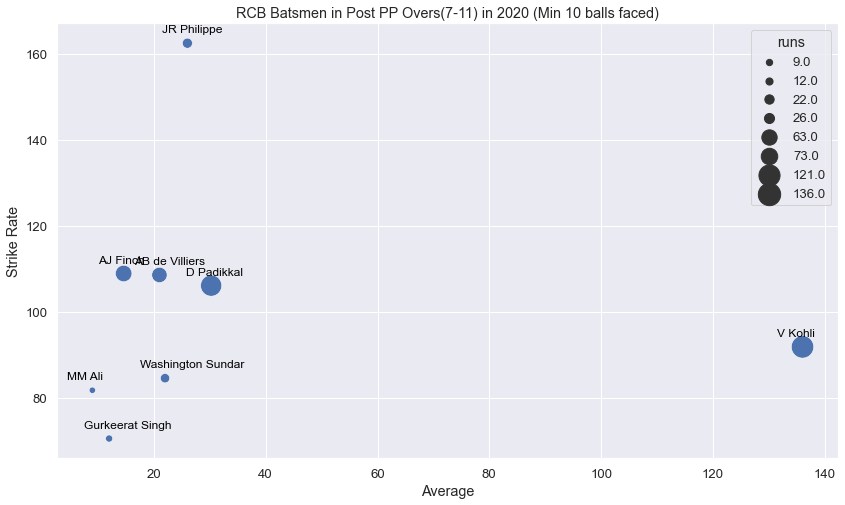

In [48]:
rcb2020_mid1 = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == 'Royal Challengers Bangalore') | (deliveries_matches['team2'] == 'Royal Challengers Bangalore'))]
rcb2020_mid1

rcb_batsmen_list = ['V Kohli', 'D Padikkal', 'AB de Villiers', 'AJ Finch', 'S Dube', 'Washington Sundar', 'Gurkeerat Singh', 'JR Philippe','NA Saini', 'CH Morris', 'MM Ali','Mohammed Siraj', 'I Udana', 'YS Chahal', 'DW Steyn', 'UT Yadav', 'Shahbaz Ahmed' ]

rcb2020_mid1 = rcb2020_mid1[rcb2020_mid1['batsman'].isin(rcb_batsmen_list)]

rcb2020_mid1['ball'] = 1
rcb2020_mid1

# for i in range(len(rcb2020)):
#     if(rcb2020.iloc[i]['batsman'] == rcb2020.iloc[i]['player_dismissed']):
#         rcb2020.iloc[i]['is_wicket'] = 1
#     else:
#         rcb2020.iloc[i]['is_wicket'] = 0
    

rcb_batsmen_over_by_over = rcb2020_mid1.groupby(['batsman', 'over']).sum()
rcb_batsmen_over_by_over.head(25)

rcb_mid1_batting = middle_overs1_batting(rcb_batsmen_list, rcb_batsmen_over_by_over)
rcb_mid1_batting

rcb_mid1_batting_min_25balls = rcb_mid1_batting[rcb_mid1_batting['balls faced'] > 9]
rcb_mid1_batting_min_25balls.reset_index(inplace=True, drop=True)
rcb_mid1_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=rcb_mid1_batting_min_25balls, size='runs', sizes=(40,500), legend='full', palette='winter')
plt.title("RCB Batsmen in Post PP Overs(7-11) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,rcb_mid1_batting_min_25balls.shape[0]):
     plt.text(rcb_mid1_batting_min_25balls['average'][line]-4.5, rcb_mid1_batting_min_25balls['strike rate'][line]+2.5, rcb_mid1_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## KKR Batsmen in Post PP Overs(7-11) in IPL 2020

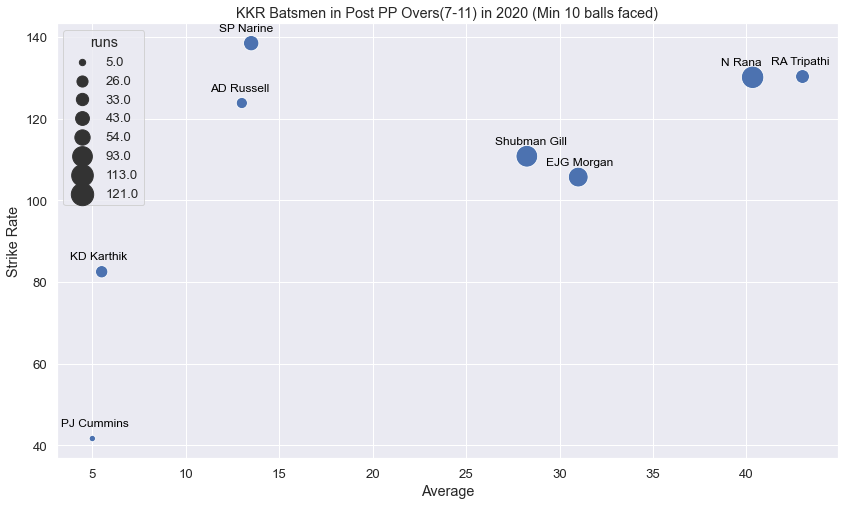

In [49]:
kkr2020_mid1 = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == 'Kolkata Knight Riders') | (deliveries_matches['team2'] == 'Kolkata Knight Riders'))]
kkr2020_mid1

kkr_batsmen_list = ['Shubman Gill', 'EJG Morgan', 'N Rana', 'RA Tripathi', 'KD Karthik',
       'PJ Cummins', 'SP Narine', 'AD Russell',
        'KL Nagarkoti', 'LH Ferguson', 'T Banton', 
       'Kuldeep Yadav', 'CV Varun',
       'Shivam Mavi', 'RK Singh',  'M Prasidh Krishna', 'NS Naik']

kkr2020_mid1 = kkr2020_mid1[kkr2020_mid1['batsman'].isin(kkr_batsmen_list)]

kkr2020_mid1['ball'] = 1
kkr2020_mid1

# for i in range(len(kkr2020)):
#     if(kkr2020.iloc[i]['batsman'] == kkr2020.iloc[i]['player_dismissed']):
#         kkr2020.iloc[i]['is_wicket'] = 1
#     else:
#         kkr2020.iloc[i]['is_wicket'] = 0
    

kkr_batsmen_over_by_over = kkr2020_mid1.groupby(['batsman', 'over']).sum()
kkr_batsmen_over_by_over.head(25)

kkr_mid1_batting = middle_overs1_batting(kkr_batsmen_list, kkr_batsmen_over_by_over)
kkr_mid1_batting

kkr_mid1_batting_min_25balls = kkr_mid1_batting[kkr_mid1_batting['balls faced'] > 9]
kkr_mid1_batting_min_25balls.reset_index(inplace=True, drop=True)
kkr_mid1_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=kkr_mid1_batting_min_25balls, size='runs',sizes=(40, 500), legend='full', palette='winter')
plt.title("KKR Batsmen in Post PP Overs(7-11) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,kkr_mid1_batting_min_25balls.shape[0]):
     plt.text(kkr_mid1_batting_min_25balls['average'][line]-1.7, kkr_mid1_batting_min_25balls['strike rate'][line]+3, kkr_mid1_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## RR Batsmen in Post PP Overs(7-11) in IPL 2020

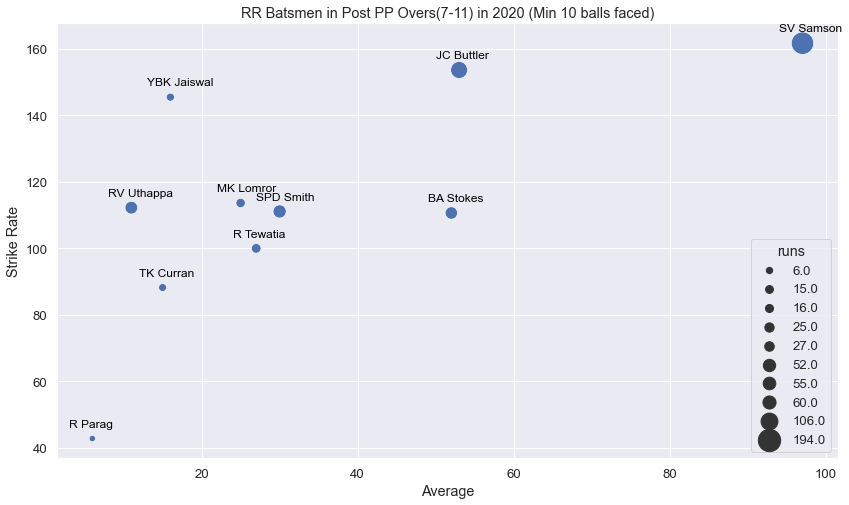

In [50]:
rr2020_mid1 = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == 'Rajasthan Royals') | (deliveries_matches['team2'] == 'Rajasthan Royals'))]
rr2020_mid1

rr_batsmen_list = ['SPD Smith', 'SV Samson', 'JC Buttler', 'BA Stokes', 'R Tewatia',
       'RV Uthappa', 
       'R Parag', 'JC Archer', 
       'TK Curran', 'MK Lomror', 'YBK Jaiswal', 'S Gopal', 'JD Unadkat',
     'AS Rajpoot', 'VR Aaron',  'AJ Tye', 'Kartik Tyagi']

rr2020_mid1 = rr2020_mid1[rr2020_mid1['batsman'].isin(rr_batsmen_list)]

rr2020_mid1['ball'] = 1
rr2020_mid1

# for i in range(len(rr2020)):
#     if(rr2020.iloc[i]['batsman'] == rr2020.iloc[i]['player_dismissed']):
#         rr2020.iloc[i]['is_wicket'] = 1
#     else:
#         rr2020.iloc[i]['is_wicket'] = 0
    

rr_batsmen_over_by_over = rr2020_mid1.groupby(['batsman', 'over']).sum()
rr_batsmen_over_by_over.head(25)

rr_mid1_batting = middle_overs1_batting(rr_batsmen_list, rr_batsmen_over_by_over)
rr_mid1_batting

rr_mid1_batting_min_25balls = rr_mid1_batting[rr_mid1_batting['balls faced'] > 9]
rr_mid1_batting_min_25balls.reset_index(inplace=True, drop=True)
rr_mid1_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=rr_mid1_batting_min_25balls, size='runs',sizes=(40, 500), legend='full', palette='winter')
plt.title("RR Batsmen in Post PP Overs(7-11) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,rr_mid1_batting_min_25balls.shape[0]):
     plt.text(rr_mid1_batting_min_25balls['average'][line]-3, rr_mid1_batting_min_25balls['strike rate'][line]+3.5, rr_mid1_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## DC Batsmen in Post PP Overs (7-11) in IPL 2020

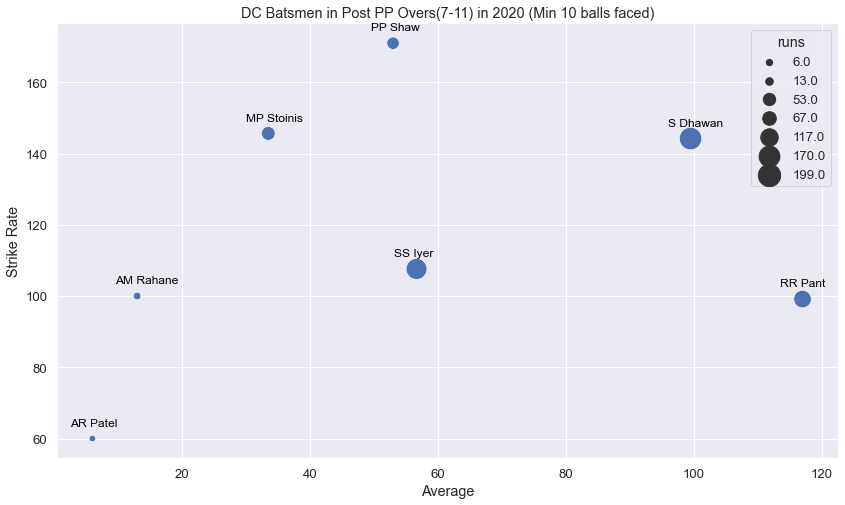

In [51]:
dc2020_mid1 = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == 'Delhi Capitals') | (deliveries_matches['team2'] == 'Delhi Capitals'))]
dc2020_mid1

dc_batsmen_list =['S Dhawan', 'SS Iyer', 'RR Pant', 'MP Stoinis', 'PP Shaw', 'SO Hetmyer',
       'AM Rahane', 
       'AR Patel', 'K Rabada', 'R Ashwin', 'AT Carey',
       'HV Patel', 'P Dubey',
       'TU Deshpande',  'A Nortje', 
       'DR Sams']

dc2020_mid1 = dc2020_mid1[dc2020_mid1['batsman'].isin(dc_batsmen_list)]

dc2020_mid1['ball'] = 1
dc2020_mid1

# for i in range(len(dc2020)):
#     if(dc2020.iloc[i]['batsman'] == dc2020.iloc[i]['player_dismissed']):
#         dc2020.iloc[i]['is_wicket'] = 1
#     else:
#         dc2020.iloc[i]['is_wicket'] = 0
    

dc_batsmen_over_by_over = dc2020_mid1.groupby(['batsman', 'over']).sum()
dc_batsmen_over_by_over.head(25)

dc_mid1_batting = middle_overs1_batting(dc_batsmen_list, dc_batsmen_over_by_over)
dc_mid1_batting

dc_mid1_batting_min_25balls = dc_mid1_batting[dc_mid1_batting['balls faced'] > 9]
dc_mid1_batting_min_25balls.reset_index(inplace=True, drop=True)
dc_mid1_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=dc_mid1_batting_min_25balls, size='runs',sizes=(40, 500), legend='full', palette='winter')
plt.title("DC Batsmen in Post PP Overs(7-11) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,dc_mid1_batting_min_25balls.shape[0]):
     plt.text(dc_mid1_batting_min_25balls['average'][line]-3.5, dc_mid1_batting_min_25balls['strike rate'][line]+3.5, dc_mid1_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## KXIP Batsmen in Post PP Overs (7-11) in IPL 2020

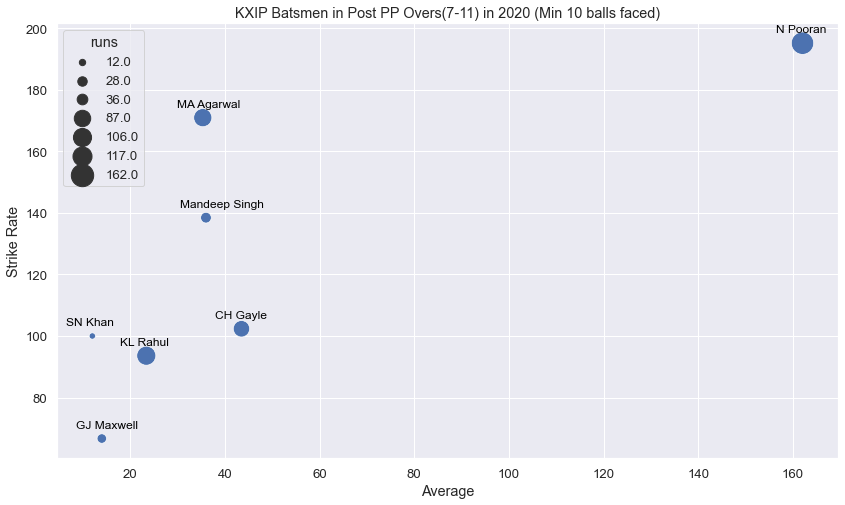

In [52]:
kxip2020_mid1 = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == 'Kings XI Punjab') | (deliveries_matches['team2'] == 'Kings XI Punjab'))]
kxip2020_mid1

kxip_batsmen_list = ['KL Rahul', 'MA Agarwal', 'CH Gayle', 'N Pooran', 'GJ Maxwell',
       'Mandeep Singh', 
       'DJ Hooda', 'CJ Jordan',
       'SN Khan',  'JDS Neesham',
        'P Simran Singh', 'KK Nair',  'Ravi Bishnoi', 
       'M Ashwin',  'Mohammed Shami', 'Arshdeep Singh',
       'Mujeeb Ur Rahman',
        'SS Cottrell']

kxip2020_mid1 = kxip2020_mid1[kxip2020_mid1['batsman'].isin(kxip_batsmen_list)]

kxip2020_mid1['ball'] = 1
kxip2020_mid1

# for i in range(len(kxip2020)):
#     if(kxip2020.iloc[i]['batsman'] == kxip2020.iloc[i]['player_dismissed']):
#         kxip2020.iloc[i]['is_wicket'] = 1
#     else:
#         kxip2020.iloc[i]['is_wicket'] = 0
    

kxip_batsmen_over_by_over = kxip2020_mid1.groupby(['batsman', 'over']).sum()
kxip_batsmen_over_by_over.head(25)

kxip_mid1_batting = middle_overs1_batting(kxip_batsmen_list, kxip_batsmen_over_by_over)
kxip_mid1_batting

kxip_mid1_batting_min_25balls = kxip_mid1_batting[kxip_mid1_batting['balls faced'] > 9]
kxip_mid1_batting_min_25balls.reset_index(inplace=True, drop=True)
kxip_mid1_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=kxip_mid1_batting_min_25balls, size='runs',sizes=(40, 500), legend='full', palette='winter')
plt.title("KXIP Batsmen in Post PP Overs(7-11) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,kxip_mid1_batting_min_25balls.shape[0]):
     plt.text(kxip_mid1_batting_min_25balls['average'][line]-5.5, kxip_mid1_batting_min_25balls['strike rate'][line]+3.5, kxip_mid1_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## SRH Batsmen in Post PP Overs (7-11) in IPL 2020

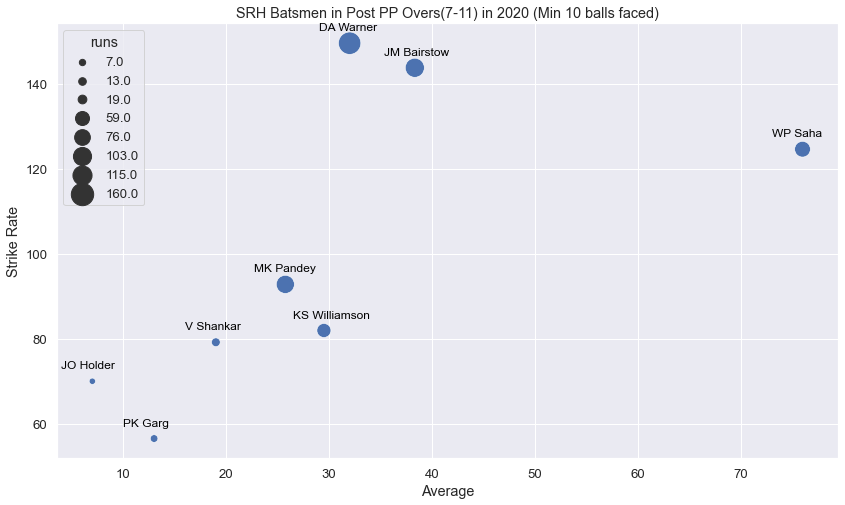

In [53]:
srh2020_mid1 = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == 'Sunrisers Hyderabad') | (deliveries_matches['team2'] == 'Sunrisers Hyderabad'))]
srh2020_mid1

srh_batsmen_list = ['DA Warner', 'MK Pandey', 'JM Bairstow', 'KS Williamson', 'WP Saha',
       'PK Garg', 'V Shankar', 'Abdul Samad', 'Abhishek Sharma', 'JO Holder', 
       'Rashid Khan', 'Sandeep Sharma',
        'S Nadeem',
       'Mohammad Nabi',
        'SP Goswami',  'T Natarajan', 'KK Ahmed', 'B Kumar', 'MR Marsh']

srh2020_mid1 = srh2020_mid1[srh2020_mid1['batsman'].isin(srh_batsmen_list)]

srh2020_mid1['ball'] = 1
srh2020_mid1

# for i in range(len(srh2020)):
#     if(srh2020.iloc[i]['batsman'] == srh2020.iloc[i]['player_dismissed']):
#         srh2020.iloc[i]['is_wicket'] = 1
#     else:
#         srh2020.iloc[i]['is_wicket'] = 0
    

srh_batsmen_over_by_over = srh2020_mid1.groupby(['batsman', 'over']).sum()
srh_batsmen_over_by_over.head(25)

srh_mid1_batting = middle_overs1_batting(srh_batsmen_list, srh_batsmen_over_by_over)
srh_mid1_batting

srh_mid1_batting_min_25balls = srh_mid1_batting[srh_mid1_batting['balls faced'] > 9]
srh_mid1_batting_min_25balls.reset_index(inplace=True, drop=True)
srh_mid1_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=srh_mid1_batting_min_25balls, size='runs',sizes=(40, 500), legend='full', palette='cool', cmap='rainbow')
plt.title("SRH Batsmen in Post PP Overs(7-11) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,srh_mid1_batting_min_25balls.shape[0]):
     plt.text(srh_mid1_batting_min_25balls['average'][line]-3, srh_mid1_batting_min_25balls['strike rate'][line]+3, srh_mid1_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## Batsmen in Post PP Overs (7-11) in IPL 2020

In [54]:
best_batsmen_in_mid_overs1_for_each_team = ['DA Warner', 'WP Saha', 'N Pooran', 'RR Pant', 'PP Shaw', 'SV Samson', 'RA Tripathi', 'SP Narine', 'V Kohli', 'JR Philippe', 'SA Yadav', 'Q de Kock', 'AT Rayudu', 'SR Watson']

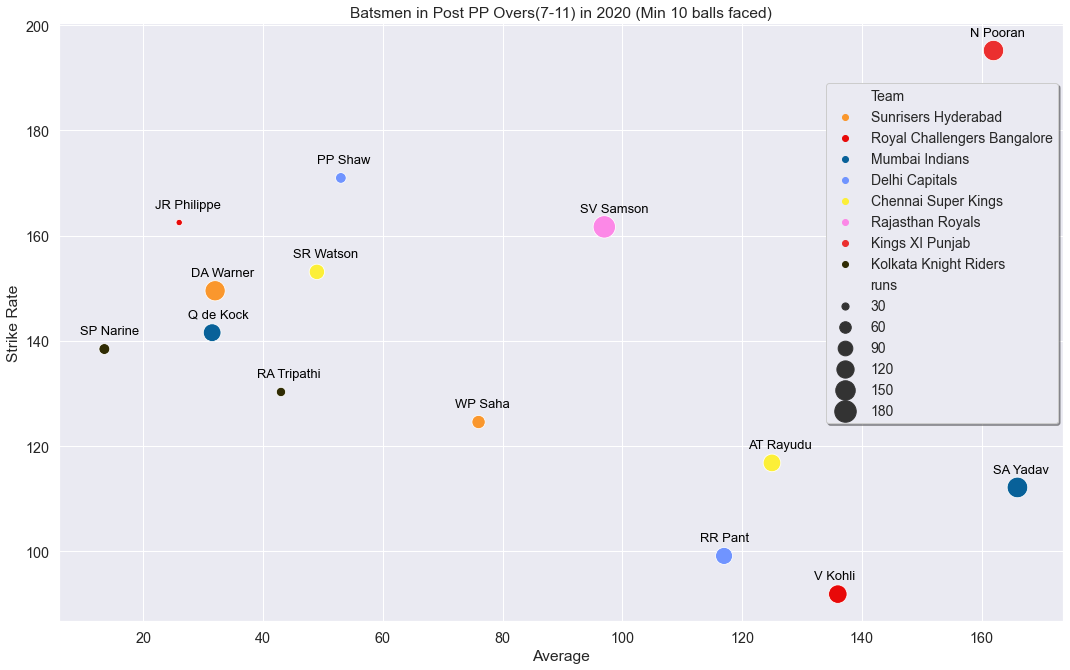

In [55]:
ipl2020_mid_overs1_batting = middle_overs1_batting(ipl2020['batsman'].value_counts().index, batsmen_over_by_over)
ipl2020_mid_overs1_batting

ipl2020_mid_overs1_batting_min_10_balls = ipl2020_mid_overs1_batting[ipl2020_mid_overs1_batting['balls faced'] > 9]
ipl2020_mid_overs1_batting_min_10_balls.reset_index(inplace=True, drop=True)
ipl2020_mid_overs1_batting_min_10_balls = ipl2020_mid_overs1_batting_min_10_balls[ipl2020_mid_overs1_batting_min_10_balls['batsman'].isin(best_batsmen_in_mid_overs1_for_each_team)]

ipl2020_mid_overs1_batting_min_10_balls.reset_index(drop=True, inplace=True)
ipl2020_mid_overs1_batting_min_10_balls['Team'] = ['Sunrisers Hyderabad', 'Royal Challengers Bangalore', 'Mumbai Indians', 'Mumbai Indians', 'Delhi Capitals', 'Chennai Super Kings', 'Chennai Super Kings', 'Rajasthan Royals',  'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Capitals', 'Sunrisers Hyderabad', 'Kolkata Knight Riders', 'Royal Challengers Bangalore']
ipl2020_mid_overs1_batting_min_10_balls

plt.figure(figsize=(18,11))
sns.set(font_scale=1.3)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=ipl2020_mid_overs1_batting_min_10_balls, hue='Team', palette=['#fa972d' ,'#e80909','#086199','#7094ff','#fcef38', '#fc88e7','#eb2f2f','#302c04'], size='runs', sizes=(40, 500))
plt.title("Batsmen in Post PP Overs(7-11) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,ipl2020_mid_overs1_batting_min_10_balls.shape[0]):
     plt.text(ipl2020_mid_overs1_batting_min_10_balls['average'][line]-4, ipl2020_mid_overs1_batting_min_10_balls['strike rate'][line]+2.8, ipl2020_mid_overs1_batting_min_10_balls['batsman'][line], horizontalalignment='left', size='small', color='black', )

plt.legend(bbox_to_anchor=(0.995, 0.9), loc=1, borderaxespad=0., fontsize=14, shadow=True)


## CSK Batsmen in Pre Death Overs (12-16) in IPL 2020

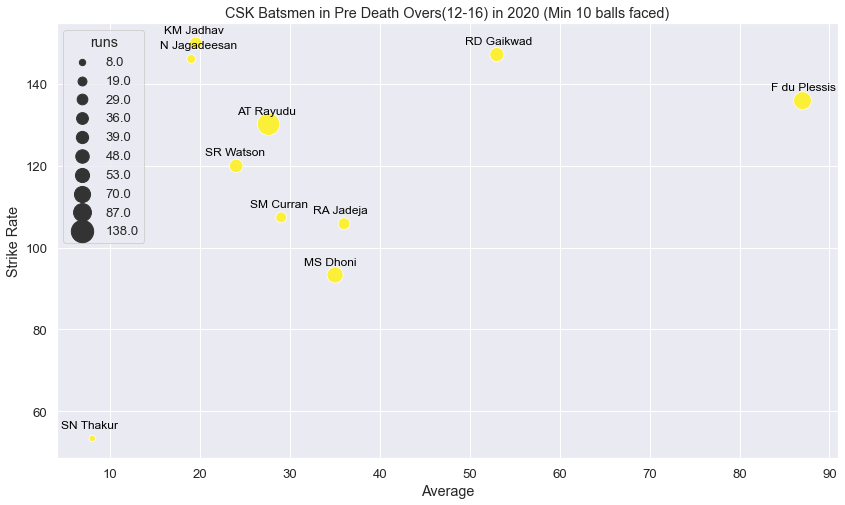

In [56]:
# csk2020_mid2 = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == 'Chennai Super Kings') | (deliveries_matches['team2'] == 'Chennai Super Kings'))]
# csk2020_mid2

# csk_batsmen_list = ['F du Plessis', 'AT Rayudu', 'SR Watson', 'MS Dhoni', 'RD Gaikwad',
#        'SM Curran', 'RA Jadeja', 'KM Jadhav', 'M Vijay', 'N Jagadeesan','SN Thakur', 'DL Chahar', 'Imran Tahir', 'DJ Bravo']

# csk2020 = csk2020[csk2020['batsman'].isin(csk_batsmen_list)]

# csk2020['ball'] = 1
# csk2020

# # for i in range(len(csk2020)):
# #     if(csk2020.iloc[i]['batsman'] == csk2020.iloc[i]['player_dismissed']):
# #         csk2020.iloc[i]['is_wicket'] = 1
# #     else:
# #         csk2020.iloc[i]['is_wicket'] = 0
    
# csk2020

# csk_batsmen_over_by_over = csk2020.groupby(['batsman', 'over']).sum()
# csk_batsmen_over_by_over.head(25)

csk_mid2_batting = middle_overs2_batting(csk_batsmen_list, csk_batsmen_over_by_over)
csk_mid2_batting

csk_mid2_batting_min_25balls = csk_mid2_batting[csk_mid2_batting['balls faced'] > 9]
csk_mid2_batting_min_25balls.reset_index(inplace=True, drop=True)
csk_mid2_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=csk_mid2_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', c=['#fcef38'])
plt.title("CSK Batsmen in Pre Death Overs(12-16) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,csk_mid2_batting_min_25balls.shape[0]):
     plt.text(csk_mid2_batting_min_25balls['average'][line]-3.5, csk_mid2_batting_min_25balls['strike rate'][line]+2.5, csk_mid2_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## MI Batsmen in Pre DEath Overs (12-16) in IPL 2020

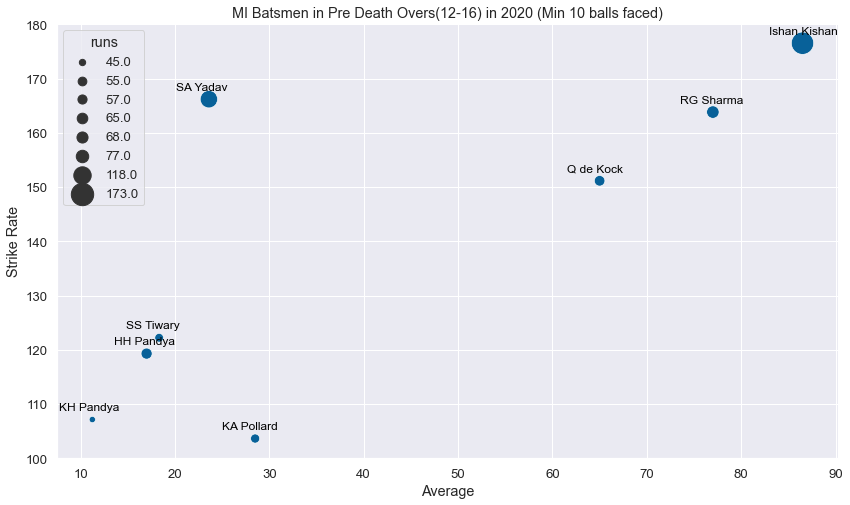

In [57]:
mi_mid2_batting = middle_overs2_batting(mi_batsmen_list, mi_batsmen_over_by_over)
mi_mid2_batting

mi_mid2_batting_min_25balls = mi_mid2_batting[mi_mid2_batting['balls faced'] > 9]
mi_mid2_batting_min_25balls.reset_index(inplace=True, drop=True)
mi_mid2_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=mi_mid2_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', c=['#086199'])
plt.title("MI Batsmen in Pre Death Overs(12-16) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,mi_mid2_batting_min_25balls.shape[0]):
     plt.text(mi_mid2_batting_min_25balls['average'][line]-3.5, mi_mid2_batting_min_25balls['strike rate'][line]+1.7, mi_mid2_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## RCB Batsmen in Pre Death Overs (12-16) in IPL 2020

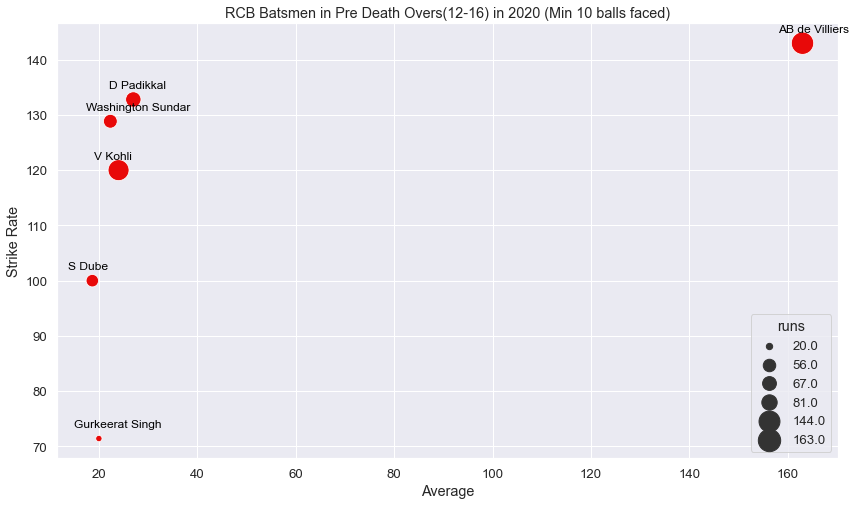

In [58]:
rcb_mid2_batting = middle_overs2_batting(rcb_batsmen_list, rcb_batsmen_over_by_over)
rcb_mid2_batting

rcb_mid2_batting_min_25balls = rcb_mid2_batting[rcb_mid2_batting['balls faced'] > 9]
rcb_mid2_batting_min_25balls.reset_index(inplace=True, drop=True)
rcb_mid2_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=rcb_mid2_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', c=['#e80909'])
plt.title("RCB Batsmen in Pre Death Overs(12-16) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,rcb_mid2_batting_min_25balls.shape[0]):
     plt.text(rcb_mid2_batting_min_25balls['average'][line]-5, rcb_mid2_batting_min_25balls['strike rate'][line]+2, rcb_mid2_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## KKR Batsmen in Pre Death Overs (12-16) in IPL 2020

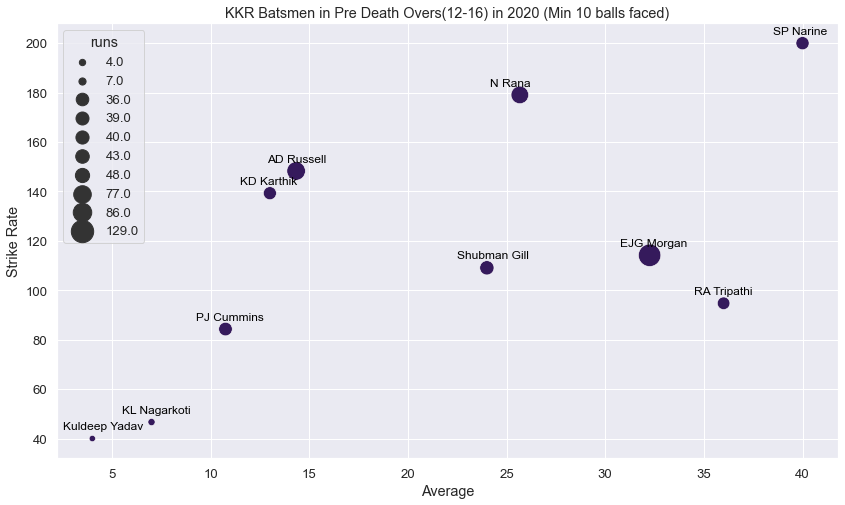

In [59]:
kkr_mid2_batting = middle_overs2_batting(kkr_batsmen_list, kkr_batsmen_over_by_over)
kkr_mid2_batting

kkr_mid2_batting_min_25balls = kkr_mid2_batting[kkr_mid2_batting['balls faced'] > 9]
kkr_mid2_batting_min_25balls.reset_index(inplace=True, drop=True)
kkr_mid2_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=kkr_mid2_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', c=['#351a5c'])
plt.title("KKR Batsmen in Pre Death Overs(12-16) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,kkr_mid2_batting_min_25balls.shape[0]):
     plt.text(kkr_mid2_batting_min_25balls['average'][line]-1.5, kkr_mid2_batting_min_25balls['strike rate'][line]+3.7, kkr_mid2_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## RR Batsmen in Pre Death Overs (12-16) in IPL 2020

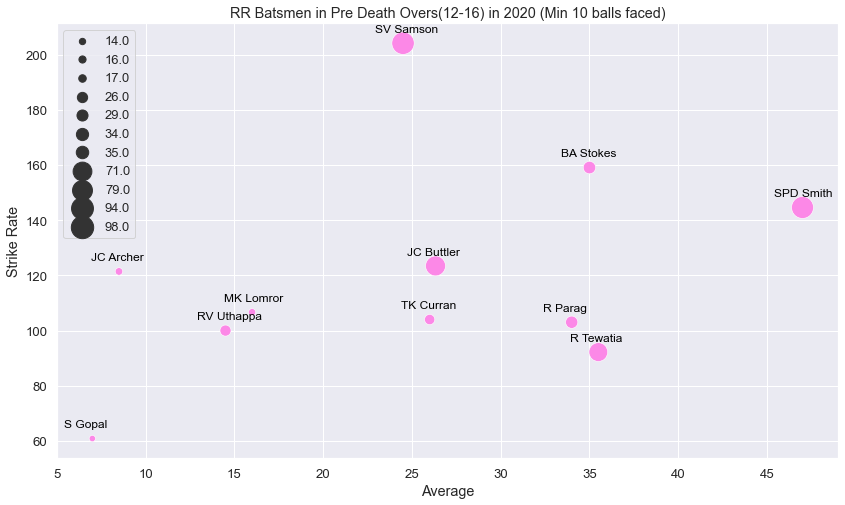

In [60]:
rr_mid2_batting = middle_overs2_batting(rr_batsmen_list, rr_batsmen_over_by_over)
rr_mid2_batting

rr_mid2_batting_min_25balls = rr_mid2_batting[rr_mid2_batting['balls faced'] > 9]
rr_mid2_batting_min_25balls.reset_index(inplace=True, drop=True)
rr_mid2_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=rr_mid2_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', c=['#fc88e7'])
plt.title("RR Batsmen in Pre Death Overs(12-16) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,rr_mid2_batting_min_25balls.shape[0]):
     plt.text(rr_mid2_batting_min_25balls['average'][line]-1.6, rr_mid2_batting_min_25balls['strike rate'][line]+4, rr_mid2_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )

plt.legend(fontsize=13)


## DC Batsmen in Pre Death Overs (12-16) in IPL 2020

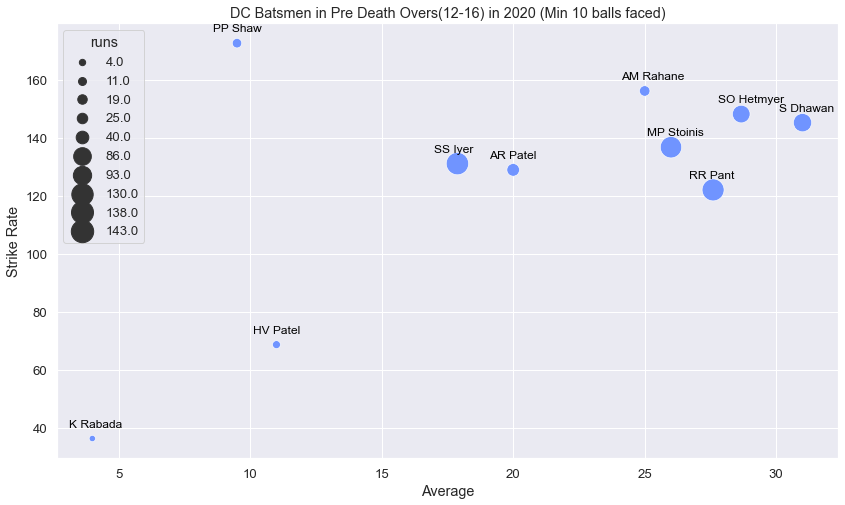

In [61]:
dc_mid2_batting = middle_overs2_batting(dc_batsmen_list, dc_batsmen_over_by_over)
dc_mid2_batting

dc_mid2_batting_min_25balls = dc_mid2_batting[dc_mid2_batting['balls faced'] > 9]
dc_mid2_batting_min_25balls.reset_index(inplace=True, drop=True)
dc_mid2_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=dc_mid2_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', c=['#7094ff'])
plt.title("DC Batsmen in Pre Death Overs(12-16) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,dc_mid2_batting_min_25balls.shape[0]):
     plt.text(dc_mid2_batting_min_25balls['average'][line]-0.9, dc_mid2_batting_min_25balls['strike rate'][line]+4, dc_mid2_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## KXIP Batsmen in Pre Death Overs (12-16) in IPL 2020

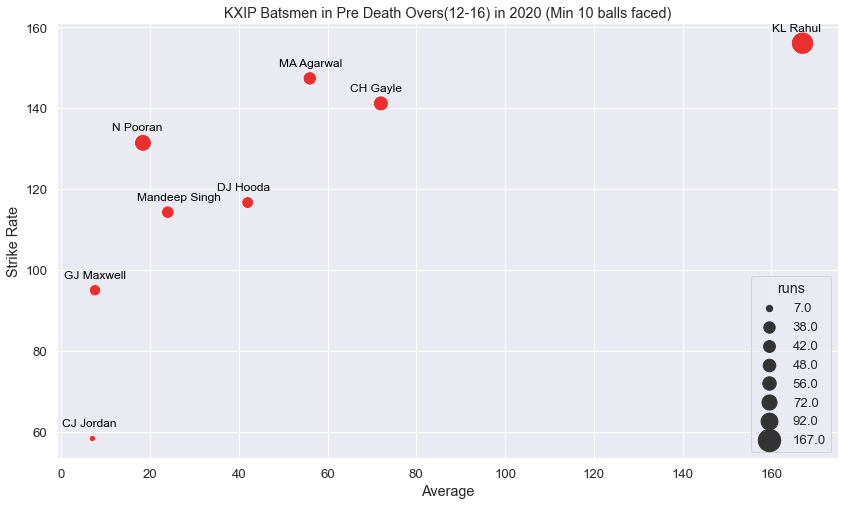

In [62]:
kxip_mid2_batting = middle_overs2_batting(kxip_batsmen_list, kxip_batsmen_over_by_over)
kxip_mid2_batting

kxip_mid2_batting_min_25balls = kxip_mid2_batting[kxip_mid2_batting['balls faced'] > 9]
kxip_mid2_batting_min_25balls.reset_index(inplace=True, drop=True)
kxip_mid2_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=kxip_mid2_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', c=['#eb2f2f'])
plt.title("KXIP Batsmen in Pre Death Overs(12-16) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,kxip_mid2_batting_min_25balls.shape[0]):
     plt.text(kxip_mid2_batting_min_25balls['average'][line]-6.9, kxip_mid2_batting_min_25balls['strike rate'][line]+3, kxip_mid2_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## SRH Batsmen in Pre Death Overs (12-16) in IPL 2020

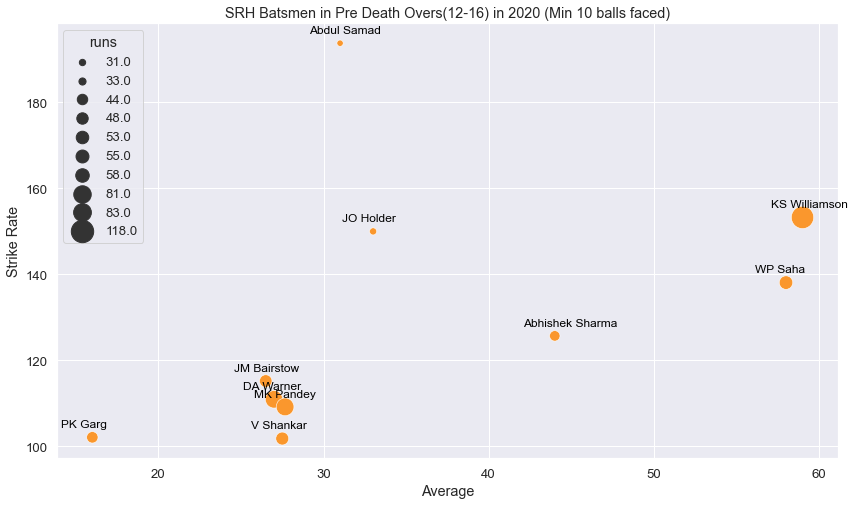

In [63]:
srh_mid2_batting = middle_overs2_batting(srh_batsmen_list, srh_batsmen_over_by_over)
srh_mid2_batting

srh_mid2_batting_min_25balls = srh_mid2_batting[srh_mid2_batting['balls faced'] > 9]
srh_mid2_batting_min_25balls.reset_index(inplace=True, drop=True)
srh_mid2_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=srh_mid2_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', c=['#fa972d'])
plt.title("SRH Batsmen in Pre Death Overs(12-16) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,srh_mid2_batting_min_25balls.shape[0]):
     plt.text(srh_mid2_batting_min_25balls['average'][line]-1.9, srh_mid2_batting_min_25balls['strike rate'][line]+2.3, srh_mid2_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## Batsmen in Pre Death Overs (12-16) in IPL 2020

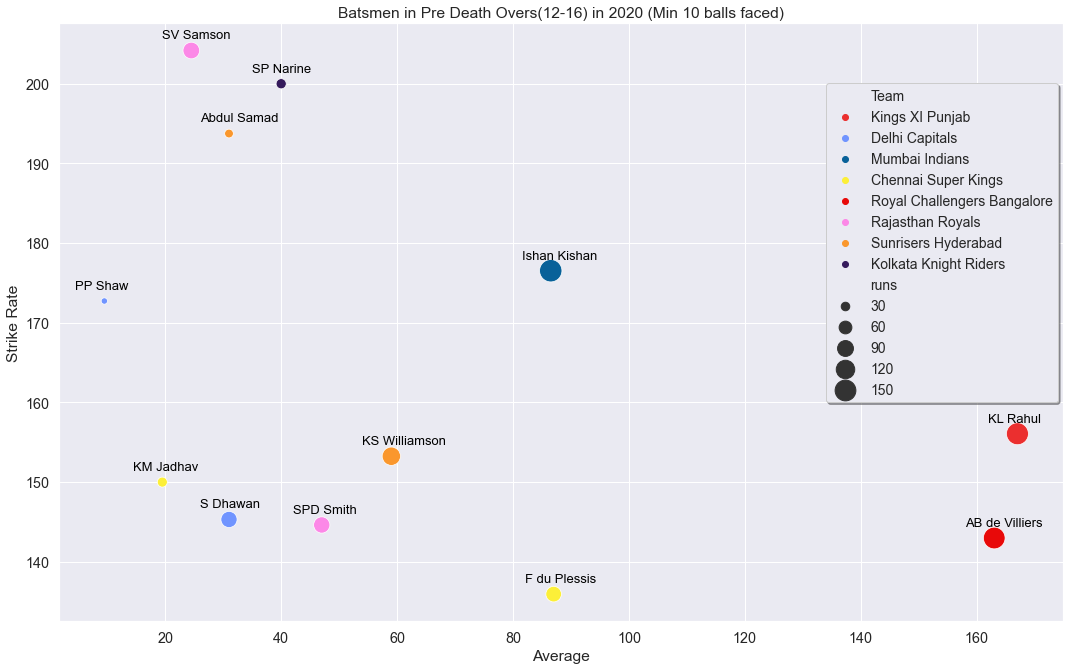

In [64]:
best_batsmen_in_mid_overs2_for_each_team = ['KS Williamson', 'Abdul Samad', 'KL Rahul', 'S Dhawan', 'PP Shaw', 'SPD Smith', 'SV Samson', 'SP Narine', 'AB de Villiers', 'Ishan Kishan', 'F du Plessis', 'KM Jadhav']

ipl2020_mid_overs2_batting = middle_overs2_batting(ipl2020['batsman'].value_counts().index, batsmen_over_by_over)
ipl2020_mid_overs2_batting

ipl2020_mid_overs2_batting_min_10_balls = ipl2020_mid_overs2_batting[ipl2020_mid_overs2_batting['balls faced'] > 9]
ipl2020_mid_overs2_batting_min_10_balls.reset_index(inplace=True, drop=True)
ipl2020_mid_overs2_batting_min_10_balls = ipl2020_mid_overs2_batting_min_10_balls[ipl2020_mid_overs2_batting_min_10_balls['batsman'].isin(best_batsmen_in_mid_overs2_for_each_team)]

ipl2020_mid_overs2_batting_min_10_balls.reset_index(drop=True, inplace=True)
ipl2020_mid_overs2_batting_min_10_balls['Team'] = ['Kings XI Punjab' ,'Delhi Capitals', 'Mumbai Indians', 'Chennai Super Kings', 'Royal Challengers Bangalore', 'Rajasthan Royals', 'Rajasthan Royals', 'Sunrisers Hyderabad', 'Delhi Capitals', 'Kolkata Knight Riders', 'Chennai Super Kings', 'Sunrisers Hyderabad']
ipl2020_mid_overs2_batting_min_10_balls

color_dict = {'Kings XI Punjab': '#eb2f2f', 'Mumbai Indians': '#086199', 'Royal Challengers Bangalore': '#e80909', 'Delhi Capitals': '#7094ff', 'Rajasthan Royals': '#fc88e7', 'Kolkata Knight Riders': '#302c04', 'Sunrisers Hyderabad': '#fa972d', 'Chennai Super Kings': '#fcef38'}

plt.figure(figsize=(18,11))
sns.set(font_scale=1.3)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=ipl2020_mid_overs2_batting_min_10_balls, hue='Team', palette=['#eb2f2f','#7094ff','#086199','#fcef38','#e80909','#fc88e7','#fa972d','#351a5c'], size='runs', sizes=(40, 500))
plt.title("Batsmen in Pre Death Overs(12-16) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,ipl2020_mid_overs2_batting_min_10_balls.shape[0]):
     plt.text(ipl2020_mid_overs2_batting_min_10_balls['average'][line]-5, ipl2020_mid_overs2_batting_min_10_balls['strike rate'][line]+1.5, ipl2020_mid_overs2_batting_min_10_balls['batsman'][line], horizontalalignment='left', size='small', color='black', )

plt.legend(bbox_to_anchor=(0.995, 0.9), loc=1, borderaxespad=0., fontsize=14, shadow=True)


## CSK Batsmen in Death Overs (17-20) in IPL 2020

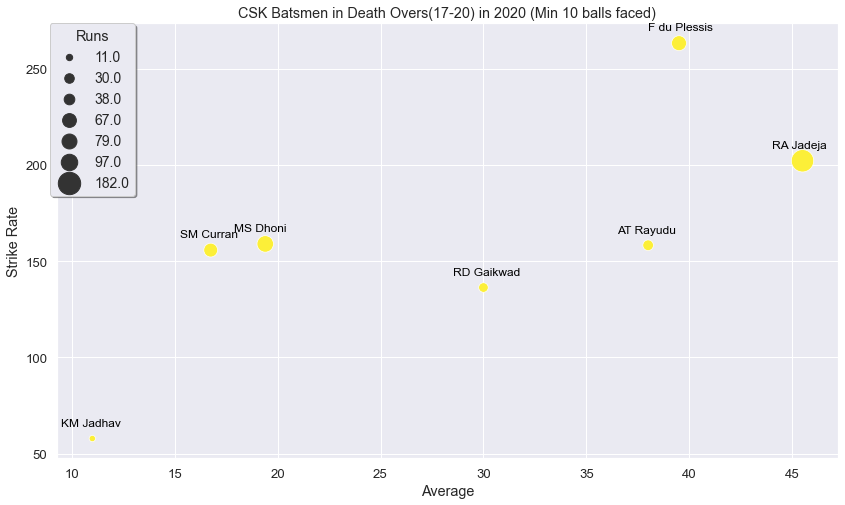

In [65]:
csk_death_batting = death_batting(csk_batsmen_list, csk_batsmen_over_by_over)
csk_death_batting

csk_death_batting_min_25balls = csk_death_batting[csk_death_batting['balls faced'] > 9]
csk_death_batting_min_25balls.reset_index(inplace=True, drop=True)
csk_death_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=csk_death_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', c=['#fcef38'])
plt.title("CSK Batsmen in Death Overs(17-20) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
plt.legend(bbox_to_anchor=(0.1, 1), loc=1, borderaxespad=0., title='Runs', fontsize=14, shadow=True)
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,csk_death_batting_min_25balls.shape[0]):
     plt.text(csk_death_batting_min_25balls['average'][line]-1.5, csk_death_batting_min_25balls['strike rate'][line]+6.5, csk_death_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## MI Batsmen in Death Overs (17-20) in IPL 2020

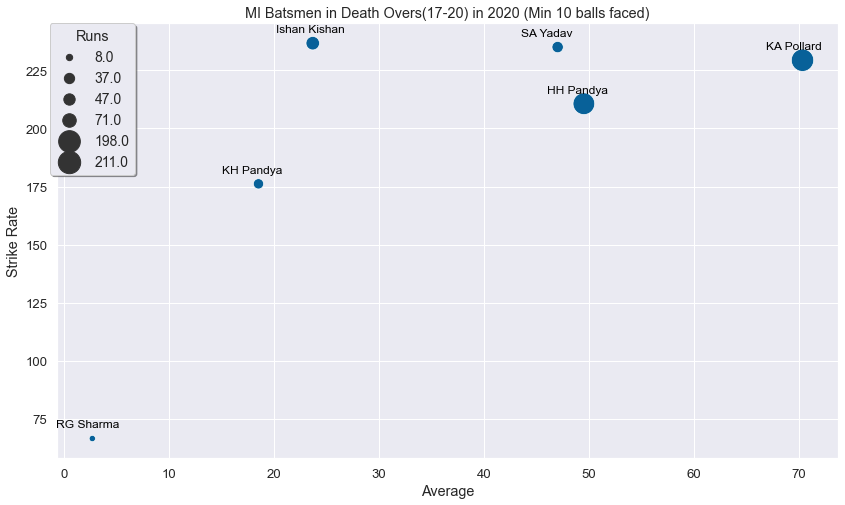

In [66]:
mi_death_batting = death_batting(mi_batsmen_list, mi_batsmen_over_by_over)
mi_death_batting

mi_death_batting_min_25balls = mi_death_batting[mi_death_batting['balls faced'] > 9]
mi_death_batting_min_25balls.reset_index(inplace=True, drop=True)
mi_death_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=mi_death_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', c=['#086199'])
plt.title("MI Batsmen in Death Overs(17-20) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
plt.legend(bbox_to_anchor=(0.1, 1), loc=1, borderaxespad=0., title='Runs', fontsize=14, shadow=True)
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,mi_death_batting_min_25balls.shape[0]):
     plt.text(mi_death_batting_min_25balls['average'][line]-3.5, mi_death_batting_min_25balls['strike rate'][line]+4.7, mi_death_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## RCB Batsmen in Death Overs (17-20) in IPL 2020

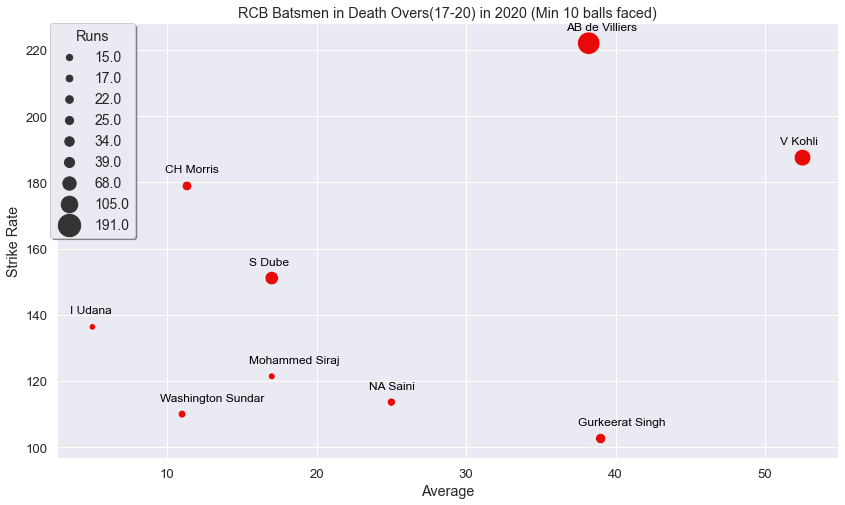

In [67]:
rcb_death_batting = death_batting(rcb_batsmen_list, rcb_batsmen_over_by_over)
rcb_death_batting

rcb_death_batting_min_25balls = rcb_death_batting[rcb_death_batting['balls faced'] > 9]
rcb_death_batting_min_25balls.reset_index(inplace=True, drop=True)
rcb_death_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=rcb_death_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', c=['#e80909'])
plt.title("RCB Batsmen in Death Overs(17-20) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
plt.legend(bbox_to_anchor=(0.1, 1), loc=1, borderaxespad=0., title='Runs', fontsize=14, shadow=True)
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,rcb_death_batting_min_25balls.shape[0]):
     plt.text(rcb_death_batting_min_25balls['average'][line]-1.5, rcb_death_batting_min_25balls['strike rate'][line]+4, rcb_death_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## KKR Batsmen in Death Overs (17-20) in IPL 2020

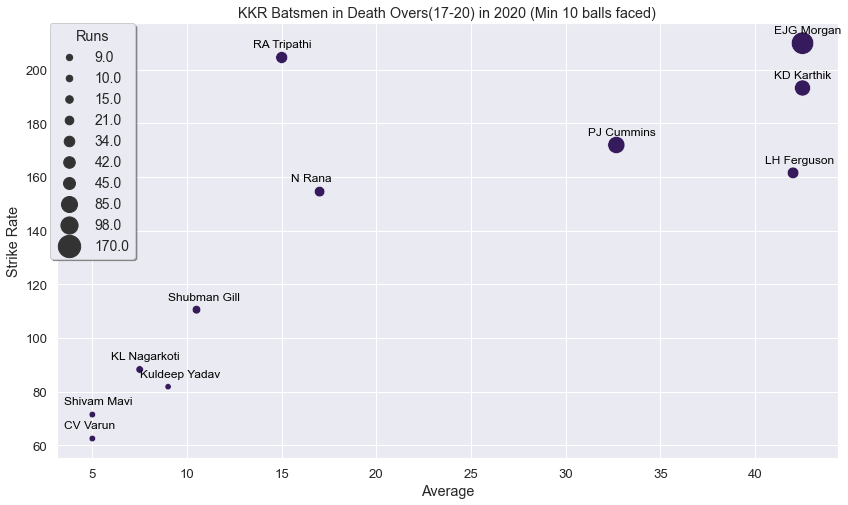

In [68]:
kkr_death_batting = death_batting(kkr_batsmen_list, kkr_batsmen_over_by_over)
kkr_death_batting

kkr_death_batting_min_25balls = kkr_death_batting[kkr_death_batting['balls faced'] > 9]
kkr_death_batting_min_25balls.reset_index(inplace=True, drop=True)
kkr_death_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=kkr_death_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', c=['#351a5c'])
plt.title("KKR Batsmen in Death Overs(17-20) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
plt.legend(bbox_to_anchor=(0.1, 1), loc=1, borderaxespad=0., title='Runs', fontsize=14, shadow=True)
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,kkr_death_batting_min_25balls.shape[0]):
     plt.text(kkr_death_batting_min_25balls['average'][line]-1.5, kkr_death_batting_min_25balls['strike rate'][line]+3.7, kkr_death_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## RR Batsmen in Death Overs (17-20) in IPL 2020

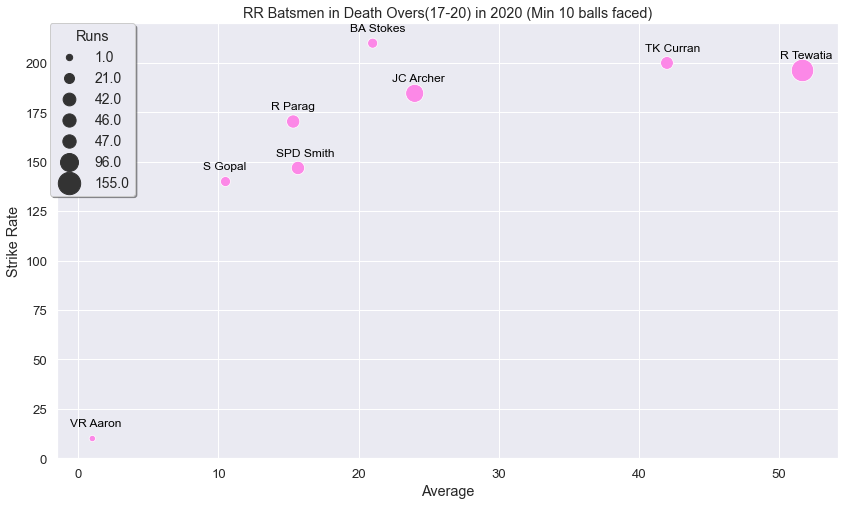

In [69]:
rr_death_batting = death_batting(rr_batsmen_list, rr_batsmen_over_by_over)
rr_death_batting

rr_death_batting_min_25balls = rr_death_batting[rr_death_batting['balls faced'] > 9]
rr_death_batting_min_25balls.reset_index(inplace=True, drop=True)
rr_death_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=rr_death_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', c=['#fc88e7'])
plt.title("RR Batsmen in Death Overs(17-20) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
plt.legend(bbox_to_anchor=(0.1, 1), loc=1, borderaxespad=0., title='Runs', fontsize=14, shadow=True)
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,rr_death_batting_min_25balls.shape[0]):
     plt.text(rr_death_batting_min_25balls['average'][line]-1.6, rr_death_batting_min_25balls['strike rate'][line]+6, rr_death_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )



## DC Batsmen in Death Overs (17-20) in IPL 2020

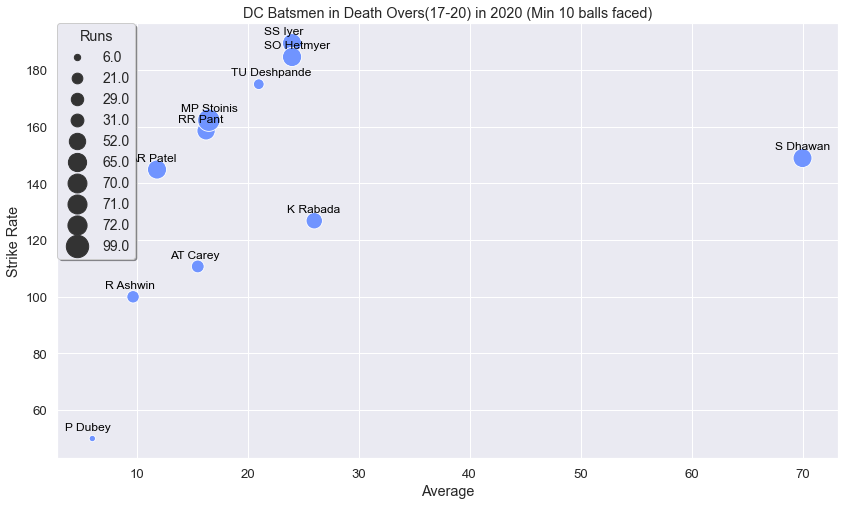

In [70]:
dc_death_batting = death_batting(dc_batsmen_list, dc_batsmen_over_by_over)
dc_death_batting

dc_death_batting_min_25balls = dc_death_batting[dc_death_batting['balls faced'] > 9]
dc_death_batting_min_25balls.reset_index(inplace=True, drop=True)
dc_death_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=dc_death_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', c=['#7094ff'])
plt.title("DC Batsmen in Death Overs(17-20) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
plt.legend(bbox_to_anchor=(0.1, 1), loc=1, borderaxespad=0., title='Runs', fontsize=14, shadow=True)
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,dc_death_batting_min_25balls.shape[0]):
     plt.text(dc_death_batting_min_25balls['average'][line]-2.5, dc_death_batting_min_25balls['strike rate'][line]+3, dc_death_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## KXIP Batsmen in Death Overs (17-20) in IPL 2020

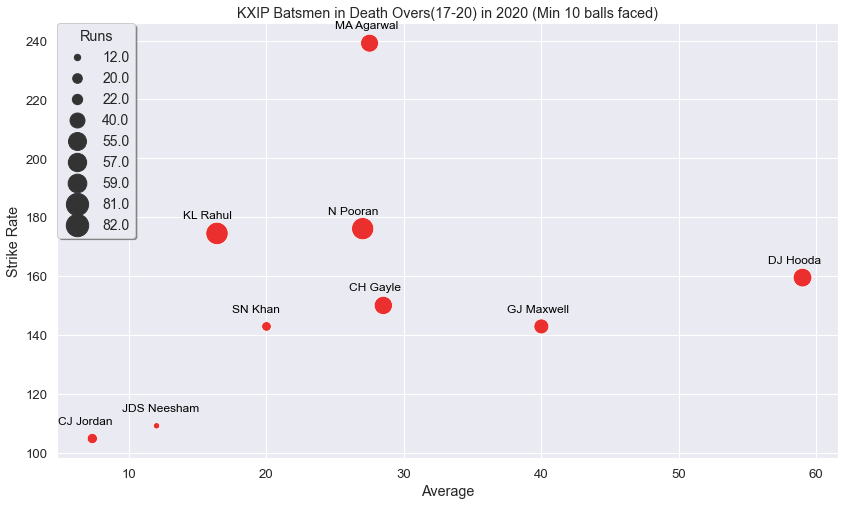

In [71]:
kxip_death_batting = death_batting(kxip_batsmen_list, kxip_batsmen_over_by_over)
kxip_death_batting

kxip_death_batting_min_25balls = kxip_death_batting[kxip_death_batting['balls faced'] > 9]
kxip_death_batting_min_25balls.reset_index(inplace=True, drop=True)
kxip_death_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=kxip_death_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', c=['#eb2f2f'])
plt.title("KXIP Batsmen in Death Overs(17-20) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
plt.legend(bbox_to_anchor=(0.1, 1), loc=1, borderaxespad=0., title='Runs', fontsize=14, shadow=True)
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,kxip_death_batting_min_25balls.shape[0]):
     plt.text(kxip_death_batting_min_25balls['average'][line]-2.5, kxip_death_batting_min_25balls['strike rate'][line]+5, kxip_death_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## SRH Batting in Death Overs (17-20) in IPL 2020

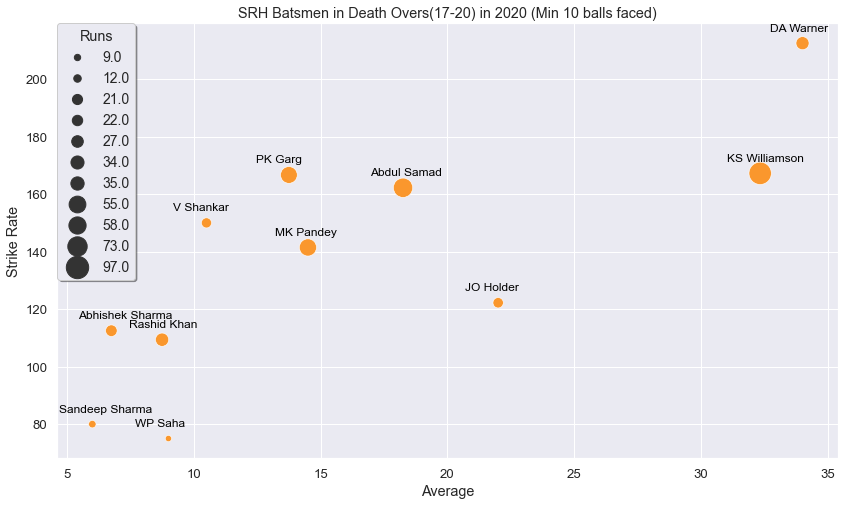

In [72]:
srh_death_batting = death_batting(srh_batsmen_list, srh_batsmen_over_by_over)
srh_death_batting

srh_death_batting_min_25balls = srh_death_batting[srh_death_batting['balls faced'] > 9]
srh_death_batting_min_25balls.reset_index(inplace=True, drop=True)
srh_death_batting_min_25balls

plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=srh_death_batting_min_25balls, size='runs', sizes=(40, 500), legend='full', c=['#fa972d'])
plt.title("SRH Batsmen in Death Overs(17-20) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
plt.legend(bbox_to_anchor=(0.1, 1), loc=1, borderaxespad=0., title='Runs', fontsize=14, shadow=True)
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,srh_death_batting_min_25balls.shape[0]):
     plt.text(srh_death_batting_min_25balls['average'][line]-1.3, srh_death_batting_min_25balls['strike rate'][line]+4.3, srh_death_batting_min_25balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## Best Batsmen in Death Overs (17-20) in IPL 2020

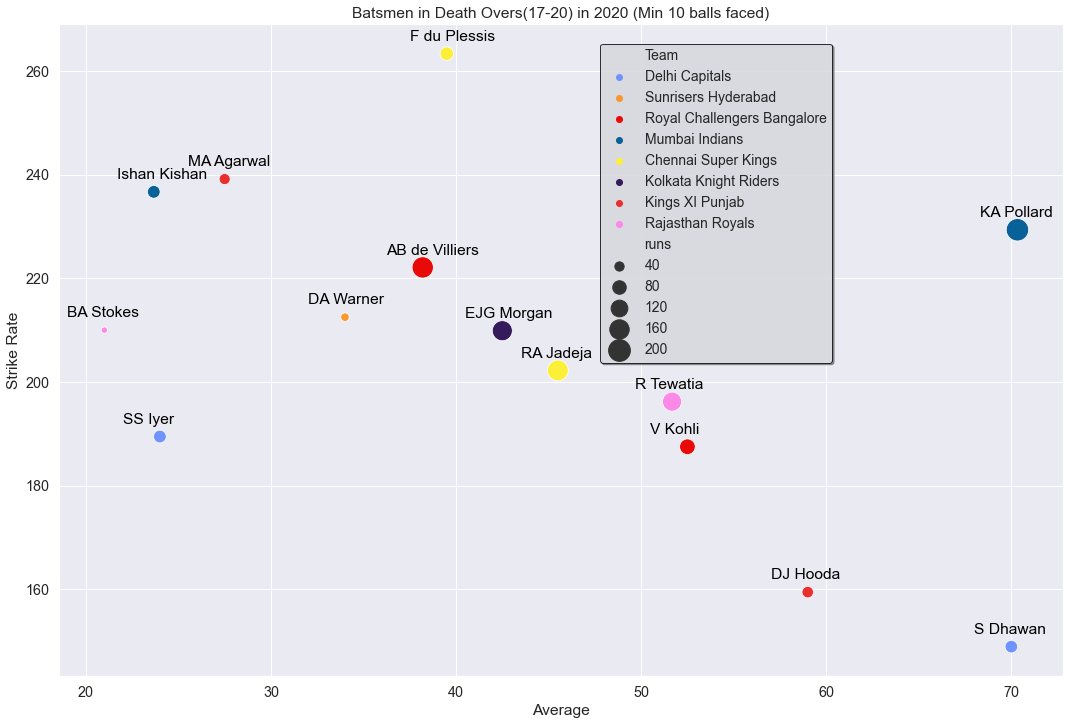

In [73]:
best_batsmen_in_death_overs_for_each_team = ['DA Warner', 'DJ Hooda', 'MA Agarwal', 'S Dhawan', 'SS Iyer', 'R Tewatia', 'BA Stokes', 'EJG Morgan', 'AB de Villiers', 'Ishan Kishan', 'F du Plessis', 'RA Jadeja', 'KA Pollard', 'V Kohli']

ipl2020_death_overs_batting = death_batting(ipl2020['batsman'].value_counts().index, batsmen_over_by_over)
ipl2020_death_overs_batting

ipl2020_death_overs_batting_min_10_balls = ipl2020_death_overs_batting[ipl2020_death_overs_batting['balls faced'] > 9]
ipl2020_death_overs_batting_min_10_balls.reset_index(inplace=True, drop=True)
ipl2020_death_overs_batting_min_10_balls = ipl2020_death_overs_batting_min_10_balls[ipl2020_death_overs_batting_min_10_balls['batsman'].isin(best_batsmen_in_death_overs_for_each_team)]

ipl2020_death_overs_batting_min_10_balls.reset_index(drop=True, inplace=True)
ipl2020_death_overs_batting_min_10_balls['Team'] = ['Delhi Capitals', 'Delhi Capitals', 'Sunrisers Hyderabad', 'Royal Challengers Bangalore', 'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rajasthan Royals', 'Rajasthan Royals', 'Mumbai Indians', 'Chennai Super Kings' ,'Kings XI Punjab']
ipl2020_death_overs_batting_min_10_balls

color_dict = {'Kings XI Punjab': '#eb2f2f', 'Mumbai Indians': '#086199', 'Royal Challengers Bangalore': '#e80909', 'Delhi Capitals': '#7094ff', 'Rajasthan Royals': '#fc88e7', 'Kolkata Knight Riders': '#302c04', 'Sunrisers Hyderabad': '#fa972d', 'Chennai Super Kings': '#fcef38'}

plt.figure(figsize=(18,12))
sns.set(font_scale=1.3)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=ipl2020_death_overs_batting_min_10_balls, hue='Team', palette=['#7094ff','#fa972d','#e80909','#086199','#fcef38','#351a5c','#eb2f2f', '#fc88e7'], size='runs', sizes=(40, 500))
plt.title("Batsmen in Death Overs(17-20) in 2020 (Min 10 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,ipl2020_death_overs_batting_min_10_balls.shape[0]):
     plt.text(ipl2020_death_overs_batting_min_10_balls['average'][line]-2, ipl2020_death_overs_batting_min_10_balls['strike rate'][line]+2.5, ipl2020_death_overs_batting_min_10_balls['batsman'][line], horizontalalignment='left', size='medium', color='black', )

plt.legend(bbox_to_anchor=(0.77, 0.97), loc=1, borderaxespad=0.,frameon=True, fancybox=True, framealpha=0.8, edgecolor='black' , fontsize=14, shadow=True)


## Batsmen in Middle Overs (7-16) in IPL 2020

In [76]:
ipl2020_mid_overs_batting = middle_overs1_batting(ipl2020['batsman'].value_counts().index, batsmen_over_by_over)
ipl2020_mid_overs_batting

ipl2020_mid_overs_batting_min_40_balls = ipl2020_mid_overs_batting[ipl2020_mid_overs_batting['balls faced'] > 74]
ipl2020_mid_overs_batting_min_40_balls.reset_index(inplace=True, drop=True)
ipl2020_mid_overs_batting_min_40_balls

,batsman,balls faced,runs,dismissals,average,strike rate
0,KL Rahul,125.0,117.0,5.0,23.40,93.60
1,SS Iyer,158.0,170.0,3.0,56.67,107.59
2,S Dhawan,138.0,199.0,2.0,99.50,144.20
3,DA Warner,107.0,160.0,5.0,32.00,149.53
4,V Kohli,148.0,136.0,0.0,136.00,91.89
5,D Padikkal,114.0,121.0,4.0,30.25,106.14
6,Shubman Gill,102.0,113.0,4.0,28.25,110.78
7,Q de Kock,89.0,126.0,4.0,31.50,141.57
8,Ishan Kishan,117.0,136.0,3.0,45.33,116.24
9,MK Pandey,111.0,103.0,4.0,25.75,92.79


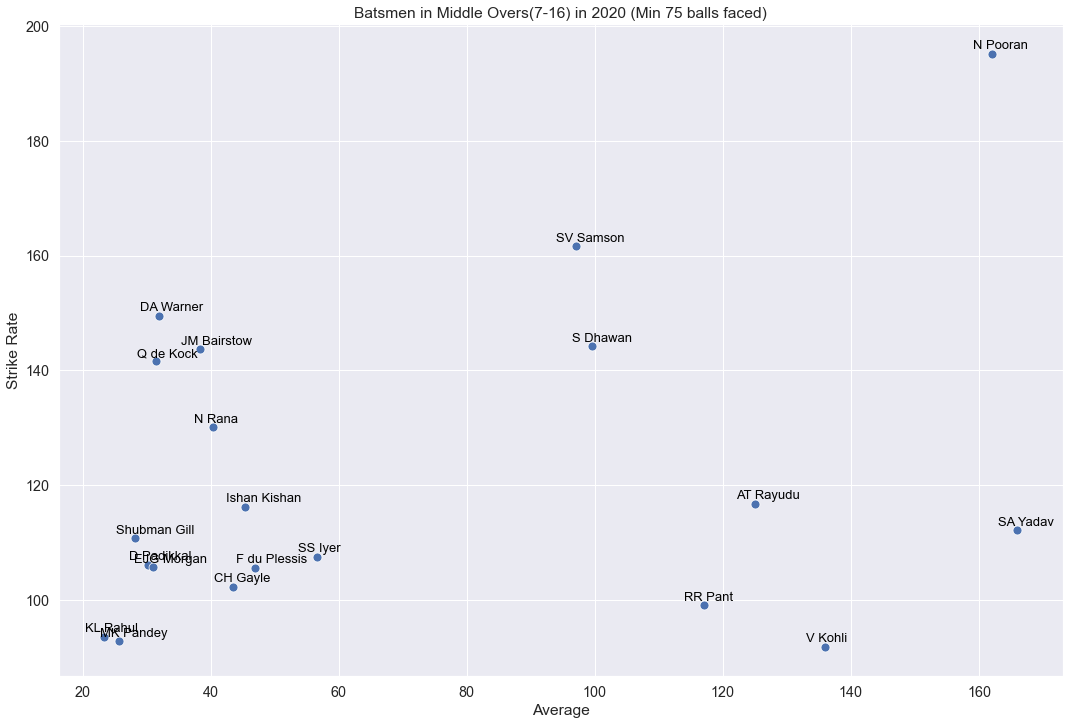

In [77]:
plt.figure(figsize=(18,12))
sns.set(font_scale=1.3)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=ipl2020_mid_overs_batting_min_40_balls,  palette='winter', s=80)
plt.title("Batsmen in Middle Overs(7-16) in 2020 (Min 75 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,ipl2020_mid_overs_batting_min_40_balls.shape[0]):
     plt.text(ipl2020_mid_overs_batting_min_40_balls['average'][line]-3, ipl2020_mid_overs_batting_min_40_balls['strike rate'][line]+0.8, ipl2020_mid_overs_batting_min_40_balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## Batsmen in Death Overs(17-20) in IPL 2020

In [78]:
ipl2020_death_overs_batting = death_batting(ipl2020['batsman'].value_counts().index, batsmen_over_by_over)
ipl2020_death_overs_batting

ipl2020_death_overs_batting_min_30_balls = ipl2020_death_overs_batting[ipl2020_death_overs_batting['balls faced'] > 29]
ipl2020_death_overs_batting_min_30_balls.reset_index(inplace=True, drop=True)
ipl2020_death_overs_batting_min_30_balls

,batsman,balls faced,runs,dismissals,average,strike rate
0,KL Rahul,47.0,82.0,5.0,16.40,174.47
1,SS Iyer,38.0,72.0,3.0,24.00,189.47
2,S Dhawan,47.0,70.0,1.0,70.00,148.94
3,V Kohli,56.0,105.0,2.0,52.50,187.50
4,Ishan Kishan,30.0,71.0,3.0,23.67,236.67
5,MK Pandey,41.0,58.0,4.0,14.50,141.46
6,F du Plessis,30.0,79.0,2.0,39.50,263.33
7,RR Pant,41.0,65.0,4.0,16.25,158.54
8,EJG Morgan,81.0,170.0,4.0,42.50,209.88
9,AB de Villiers,86.0,191.0,5.0,38.20,222.09


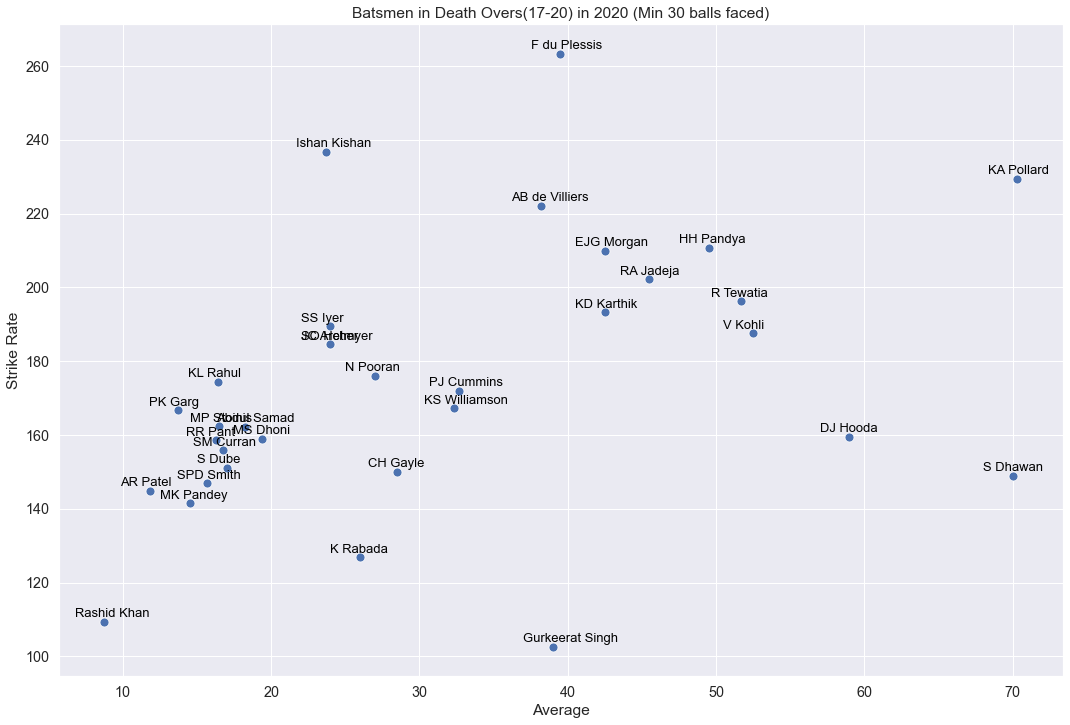

In [79]:
plt.figure(figsize=(18,12))
sns.set(font_scale=1.3)
sns.set_style('darkgrid')
sns.scatterplot(x='average', y='strike rate', data=ipl2020_death_overs_batting_min_30_balls,  palette='winter', s=80)
plt.title("Batsmen in Death Overs(17-20) in 2020 (Min 30 balls faced)")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,ipl2020_death_overs_batting_min_30_balls.shape[0]):
     plt.text(ipl2020_death_overs_batting_min_30_balls['average'][line]-2, ipl2020_death_overs_batting_min_30_balls['strike rate'][line]+1.3, ipl2020_death_overs_batting_min_30_balls['batsman'][line], horizontalalignment='left', size='small', color='black', )


## Function to extract phase wise batting stats for each team in IPL 2020

In [80]:
powerplay_batting = pd.DataFrame(columns=['Team', 'Innings', 'Runs Scored', 'Wickets Lost', 'Average', 'Run Rate'])
mid_overs1_batting = pd.DataFrame(columns=['Team', 'Innings', 'Runs Scored', 'Wickets Lost', 'Average', 'Run Rate'])
mid_overs2_batting = pd.DataFrame(columns=['Team', 'Innings', 'Runs Scored', 'Wickets Lost', 'Average', 'Run Rate'])
death_overs_batting = pd.DataFrame(columns=['Team', 'Innings', 'Runs Scored', 'Wickets Lost', 'Average', 'Run Rate'])

def phase_wise_batting():
    global powerplay_batting, mid_overs1_batting, mid_overs2_batting, death_overs_batting
    
    for team in ['Chennai Super Kings', 'Mumbai Indians', 'Royal Challengers Bangalore', 'Delhi Capitals', 'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Rajasthan Royals', 'Kings XI Punjab']:
        new = deliveries_matches[deliveries_matches['date'].str.startswith('2020') & ((deliveries_matches['team1'] == team) | (deliveries_matches['team2'] == team))]
        new_batting = new[((new['toss_winner'] == team) & (new['toss_decision'] == 'field') & (new['inning'] == 2)) | ((new['toss_winner'] == team) & (new['toss_decision'] == 'bat') & (new['inning'] == 1)) | ((new['toss_winner'] != team) & (new['toss_decision'] == 'field') & (new['inning'] == 1)) | ((new['toss_winner'] != team) & (new['toss_decision'] == 'bat') & (new['inning'] == 2))]
        new_batting['ball'] = 1
        new_batting['inning'] = 1

        new_batting_pp_only = new_batting[new_batting['over'] < 6]
        new_batting_mo1_only = new_batting[(new_batting['over'] >= 6 )& (new_batting['over'] < 11)]
        new_batting_mo2_only = new_batting[(new_batting['over'] >= 11 )& (new_batting['over'] < 16)]
        new_batting_death_only = new_batting[new_batting['over'] > 15]
        
#         print(new_batting_pp_only.head())
#         print(new_batting_mo_only.head())
#         print(new_batting_death_only.head())

        pp_balls_faced = new_batting_pp_only.sum().ball
        pp_runs_scored = new_batting_pp_only.sum().total_runs
        pp_wickets_lost = new_batting_pp_only.sum().is_wicket
        pp_average = pp_runs_scored / pp_wickets_lost
        pp_run_rate = pp_runs_scored/ pp_balls_faced * 6

#         print(pp_balls_faced, pp_runs_scored, pp_wickets_lost, pp_average, pp_run_rate)
        
        mo1_balls_faced = new_batting_mo1_only.sum().ball
        mo1_runs_scored = new_batting_mo1_only.sum().total_runs
        mo1_wickets_lost = new_batting_mo1_only.sum().is_wicket
        mo1_average = mo1_runs_scored / mo1_wickets_lost
        mo1_run_rate = mo1_runs_scored/ mo1_balls_faced * 6
        
        mo2_balls_faced = new_batting_mo2_only.sum().ball
        mo2_runs_scored = new_batting_mo2_only.sum().total_runs
        mo2_wickets_lost = new_batting_mo2_only.sum().is_wicket
        mo2_average = mo2_runs_scored / mo2_wickets_lost
        mo2_run_rate = mo2_runs_scored/ mo2_balls_faced * 6

#         print(mo_balls_faced, mo_runs_scored, mo_wickets_lost, mo_average, mo_run_rate)
        
        death_balls_faced = new_batting_death_only.sum().ball
        death_runs_scored = new_batting_death_only.sum().total_runs
        death_wickets_lost = new_batting_death_only.sum().is_wicket
        death_average = death_runs_scored / death_wickets_lost
        death_run_rate = death_runs_scored/ death_balls_faced * 6

        powerplay_batting = powerplay_batting.append({'Team': team, 'Innings': new_batting.sum().inning, 'Runs Scored': pp_runs_scored, 'Wickets Lost': pp_wickets_lost, 'Average': pp_average, 'Run Rate': pp_run_rate}, ignore_index=True)
        mid_overs1_batting = mid_overs1_batting.append({'Team': team, 'Innings': new_batting.sum().inning, 'Runs Scored': mo1_runs_scored, 'Wickets Lost': mo1_wickets_lost, 'Average': mo1_average, 'Run Rate': mo1_run_rate}, ignore_index=True)
        mid_overs2_batting = mid_overs2_batting.append({'Team': team, 'Innings': new_batting.sum().inning, 'Runs Scored': mo2_runs_scored, 'Wickets Lost': mo2_wickets_lost, 'Average': mo2_average, 'Run Rate': mo2_run_rate}, ignore_index=True)
        death_overs_batting = death_overs_batting.append({'Team': team, 'Innings': new_batting.sum().inning, 'Runs Scored': death_runs_scored, 'Wickets Lost': death_wickets_lost, 'Average': death_average, 'Run Rate': death_run_rate}, ignore_index=True)
    
    powerplay_batting = powerplay_batting.round(decimals=2)
    mid_overs1_batting = mid_overs1_batting.round(decimals=2)
    mid_overs2_batting = mid_overs2_batting.round(decimals=2)
    death_overs_batting = death_overs_batting.round(decimals=2)
    

    return [powerplay_batting, mid_overs1_batting, mid_overs2_batting, death_overs_batting]

In [81]:
ipl2020_phasewise_teamwise_batting = phase_wise_batting()

Text(0.5, 1.0, 'PowerPlay Batting numbers for each team in IPL 2020')

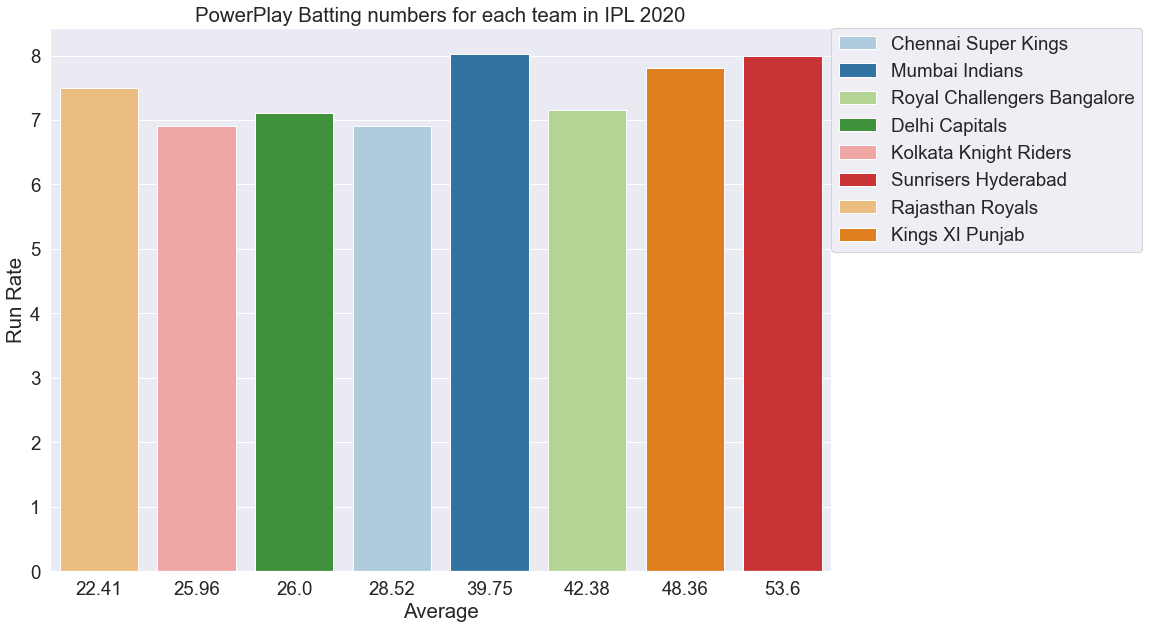

In [82]:
plt.figure(figsize=(14,10))
sns.set(font_scale=1.7)
# sns.set_style('darkgrid')
sns.barplot(x='Average',y='Run Rate', data=ipl2020_phasewise_teamwise_batting[0],hue='Team',  dodge=False, palette='Paired' )
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.title("PowerPlay Batting numbers for each team in IPL 2020")

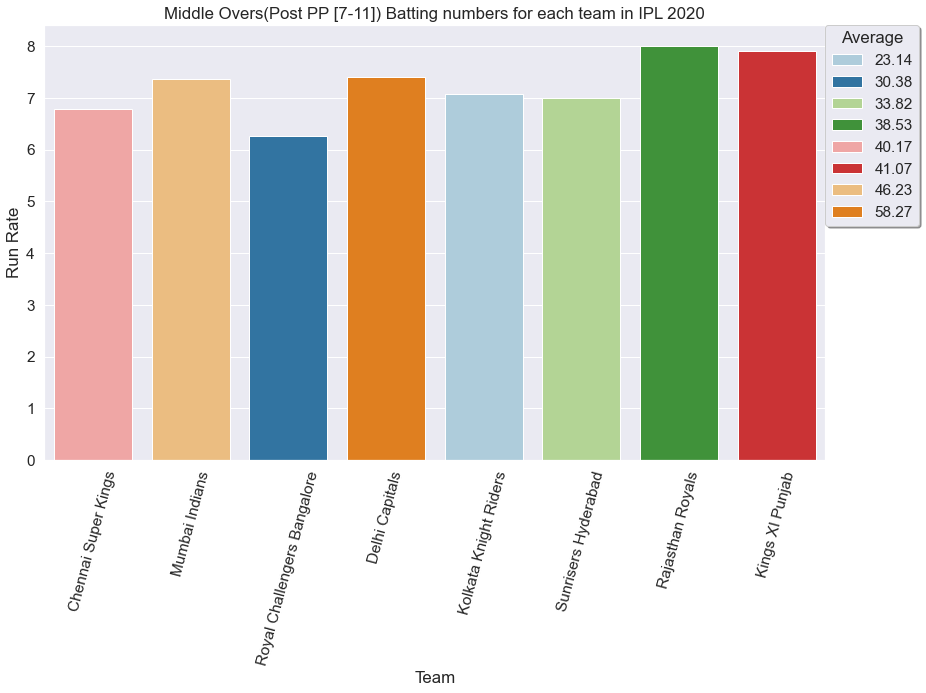

In [83]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
sns.barplot(x='Team',y='Run Rate', data=ipl2020_phasewise_teamwise_batting[1],hue='Average', palette='Paired', dodge=False )
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Average', shadow=True)
plt.title("Middle Overs(Post PP [7-11]) Batting numbers for each team in IPL 2020")
plt.xticks(rotation=75);

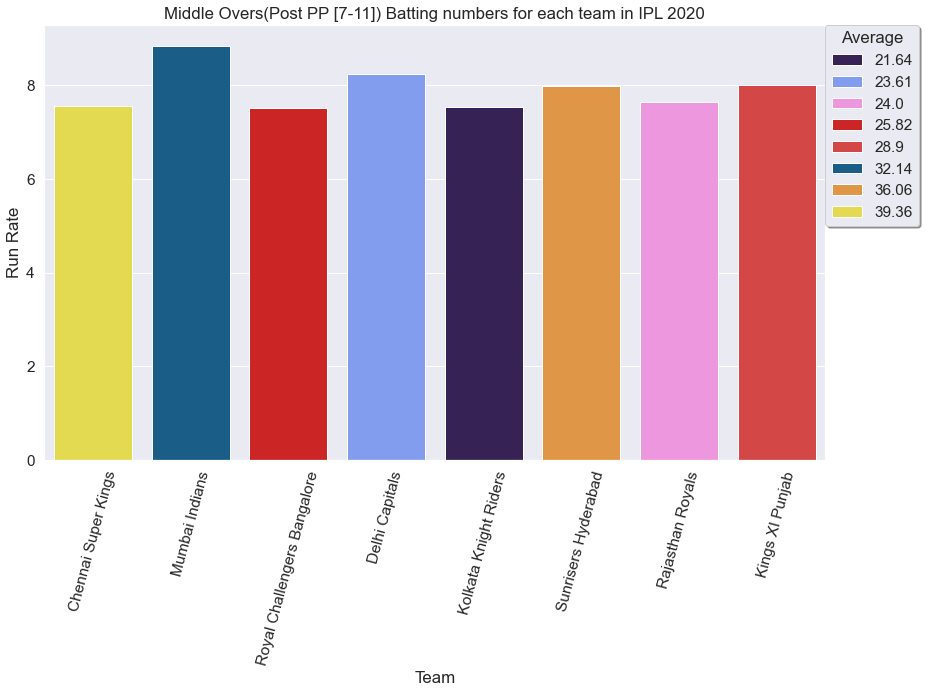

In [87]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
sns.barplot(x='Team',y='Run Rate', data=ipl2020_phasewise_teamwise_batting[2],hue='Average', palette=color_dict, dodge=False )
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Average', shadow=True)
plt.title("Middle Overs(Post PP [7-11]) Batting numbers for each team in IPL 2020")
plt.xticks(rotation=75);

In [88]:
color_dict = {28.9: '#eb2f2f', 32.14: '#086199', 25.82: '#e80909', 23.61: '#7094ff', 24.0: '#fc88e7', 21.64: '#351a5c', 36.06: '#fa972d', 39.36: '#fcef38'}
color_dict_death = {14.31: '#fa972d',19.12: '#7094ff',21.04: '#eb2f2f',21.84: '#e80909',22.0: '#351a5c', 22.09: '#fc88e7',27.95: '#fcef38',33.2: '#086199'}

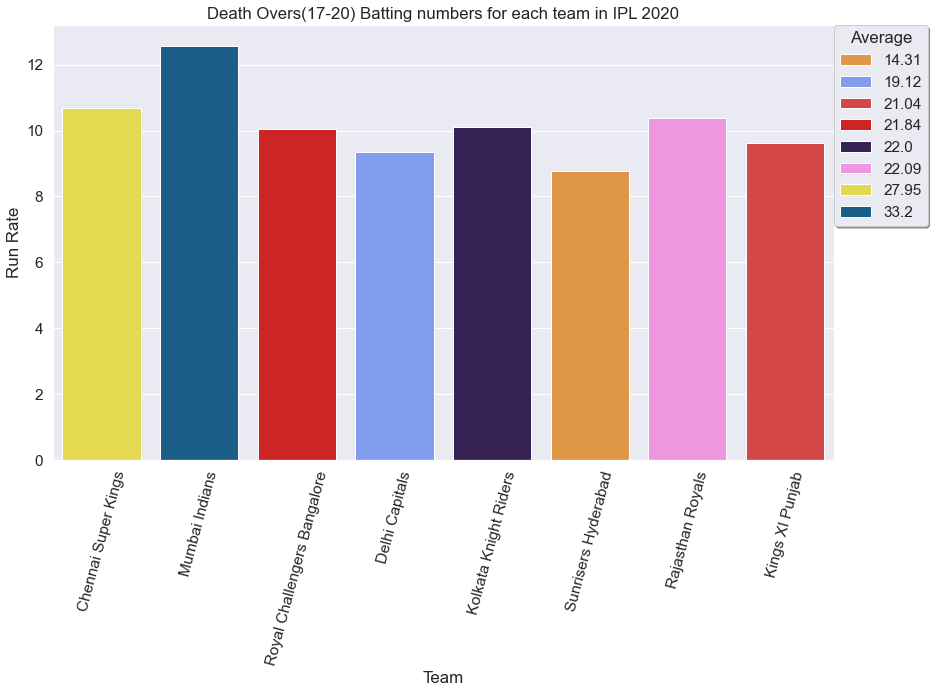

In [89]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
sns.barplot(x='Team',y='Run Rate', data=ipl2020_phasewise_teamwise_batting[3],hue='Average',palette=color_dict_death, dodge=False )
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Average', shadow=True)
plt.title("Death Overs(17-20) Batting numbers for each team in IPL 2020")
plt.xticks(rotation=75);

In [90]:
ipl2020_phasewise_teamwise_batting[0]

,Team,Innings,Runs Scored,Wickets Lost,Average,Run Rate
0,Chennai Super Kings,1699,599,21,28.52,6.90
1,Mumbai Indians,1859,795,20,39.75,8.03
2,Royal Challengers Bangalore,1813,678,16,42.38,7.16
3,Delhi Capitals,2105,754,29,26.00,7.11
4,Kolkata Knight Riders,1721,597,23,25.96,6.90
5,Sunrisers Hyderabad,1928,804,15,53.60,7.99
6,Rajasthan Royals,1681,650,29,22.41,7.49
7,Kings XI Punjab,1704,677,14,48.36,7.81


In [91]:
ipl2020_phasewise_teamwise_batting[2]

,Team,Innings,Runs Scored,Wickets Lost,Average,Run Rate
0,Chennai Super Kings,1699,551,14,39.36,7.55
1,Mumbai Indians,1859,675,21,32.14,8.84
2,Royal Challengers Bangalore,1813,568,22,25.82,7.51
3,Delhi Capitals,2105,732,31,23.61,8.24
4,Kolkata Knight Riders,1721,541,25,21.64,7.53
5,Sunrisers Hyderabad,1928,649,18,36.06,7.98
6,Rajasthan Royals,1681,552,23,24.00,7.65
7,Kings XI Punjab,1704,578,20,28.90,8.01


In [92]:
srh_death_batting_min_25balls

,batsman,balls faced,runs,dismissals,average,strike rate
0,DA Warner,16.0,34.0,0.0,34.00,212.50
1,MK Pandey,41.0,58.0,4.0,14.50,141.46
2,KS Williamson,58.0,97.0,3.0,32.33,167.24
3,WP Saha,12.0,9.0,0.0,9.00,75.00
4,PK Garg,33.0,55.0,4.0,13.75,166.67
5,V Shankar,14.0,21.0,2.0,10.50,150.00
6,Abdul Samad,45.0,73.0,4.0,18.25,162.22
7,Abhishek Sharma,24.0,27.0,4.0,6.75,112.50
8,JO Holder,18.0,22.0,1.0,22.00,122.22
9,Rashid Khan,32.0,35.0,4.0,8.75,109.38


In [93]:
rcb_powerplay_batting_min_10balls

,batsman,balls faced,runs,dismissals,average,strike rate
0,V Kohli,76.0,81.0,3.0,27.0,106.58
1,D Padikkal,219.0,271.0,5.0,54.2,123.74
2,AJ Finch,182.0,189.0,5.0,37.8,103.85
3,JR Philippe,57.0,51.0,2.0,25.5,89.47


In [94]:
rcb_mid1_batting_min_25balls

,batsman,balls faced,runs,dismissals,average,strike rate
0,V Kohli,148.0,136.0,0.0,136.00,91.89
1,D Padikkal,114.0,121.0,4.0,30.25,106.14
2,AB de Villiers,58.0,63.0,3.0,21.00,108.62
3,AJ Finch,67.0,73.0,5.0,14.60,108.96
4,Washington Sundar,26.0,22.0,1.0,22.00,84.62
5,Gurkeerat Singh,17.0,12.0,1.0,12.00,70.59
6,JR Philippe,16.0,26.0,1.0,26.00,162.50
7,MM Ali,11.0,9.0,1.0,9.00,81.82


In [95]:
rcb_mid2_batting_min_25balls

,batsman,balls faced,runs,dismissals,average,strike rate
0,V Kohli,120.0,144.0,6.0,24.00,120.00
1,D Padikkal,61.0,81.0,3.0,27.00,132.79
2,AB de Villiers,114.0,163.0,1.0,163.00,142.98
3,S Dube,56.0,56.0,3.0,18.67,100.00
4,Washington Sundar,52.0,67.0,3.0,22.33,128.85
5,Gurkeerat Singh,28.0,20.0,0.0,20.00,71.43


In [96]:
sainiVPollardPandya = deliveries_matches[(deliveries_matches['bowler'] == 'NA Saini') & ((deliveries_matches['batsman'] == 'HH Pandya') | (deliveries_matches['batsman'] == 'KA Pollard')) ]

In [97]:
sainiVPollardPandya['ball'] = 1
sainiVPollardPandya['batsman_runs'].sum()

25

In [98]:
sainiVPollardPandya['is_wicket']

166261    0
166262    0
166263    0
166264    0
166265    0
166267    0
172149    0
172150    0
172151    0
172152    0
172154    0
192389    0
192391    0
192463    0
192482    0
Name: is_wicket, dtype: int64

In [99]:
csk_powerplay_batting_min_10balls

,batsman,balls faced,runs,dismissals,average,strike rate
0,F du Plessis,146.0,189.0,6.0,31.5,129.45
1,AT Rayudu,52.0,58.0,2.0,29.0,111.54
2,SR Watson,147.0,151.0,5.0,30.2,102.72
3,RD Gaikwad,68.0,66.0,1.0,66.0,97.06
4,SM Curran,43.0,48.0,2.0,24.0,111.63
5,M Vijay,40.0,30.0,2.0,15.0,75.00


In [102]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [110]:
post2016 = matches[matches['date'].str.startswith('2016') | matches['date'].str.startswith('2017') | matches['date'].str.startswith('2018') | matches['date'].str.startswith('2019') | matches['date'].str.startswith('2020')]
post2016.venue.value_counts()

Rajiv Gandhi International Stadium, Uppal               30
Eden Gardens                                            30
Wankhede Stadium                                        28
Feroz Shah Kotla                                        28
Dubai International Cricket Stadium                     26
Sheikh Zayed Stadium                                    22
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 17
M Chinnaswamy Stadium                                   16
M.Chinnaswamy Stadium                                   15
Sawai Mansingh Stadium                                  14
Sharjah Cricket Stadium                                 12
Saurashtra Cricket Association Stadium                  10
MA Chidambaram Stadium, Chepauk                          9
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      8
Holkar Cricket Stadium                                   7
Green Park                                              

In [104]:
# all_teams_batting_2020 = pd.DataFrame(columns=['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
#        'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
#        'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
#        'batting_team', 'bowling_team', 'city', 'date', 'player_of_match',
#        'venue', 'neutral_venue', 'team1', 'team2', 'toss_winner',
#        'toss_decision', 'winner', 'result', 'result_margin', 'eliminator',
#        'method', 'umpire1', 'umpire2'])

for team in ['Chennai Super Kings', 'Mumbai Indians', 'Royal Challengers Bangalore', 'Delhi Capitals', 'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Rajasthan Royals', 'Kings XI Punjab']:
    new = deliveries_matches[deliveries_matches['date'].str.startswith('2018') & ((deliveries_matches['team1'] == team) | (deliveries_matches['team2'] == team))]
    new_batting = new[((new['toss_winner'] == team) & (new['toss_decision'] == 'field') & (new['inning'] == 2)) | ((new['toss_winner'] == team) & (new['toss_decision'] == 'bat') & (new['inning'] == 1)) | ((new['toss_winner'] != team) & (new['toss_decision'] == 'field') & (new['inning'] == 1)) | ((new['toss_winner'] != team) & (new['toss_decision'] == 'bat') & (new['inning'] == 2))]
    new_batting['ball'] = 1
    new_batting['inning'] = 1
#     pd.concat([all_teams_batting_2020, new_batting])
#     all_teams_batting_2020 = all_teams_batting_2020.append(new_batting)
        
new_batting


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
150660,1136562,1,0,1,KL Rahul,MA Agarwal,TA Boult,0,0,0,...,Delhi Daredevils,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,N,NaN,KN Ananthapadmanabhan,RJ Tucker
150661,1136562,1,0,1,KL Rahul,MA Agarwal,TA Boult,2,0,2,...,Delhi Daredevils,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,N,NaN,KN Ananthapadmanabhan,RJ Tucker
150662,1136562,1,0,1,KL Rahul,MA Agarwal,TA Boult,0,0,0,...,Delhi Daredevils,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,N,NaN,KN Ananthapadmanabhan,RJ Tucker
150663,1136562,1,0,1,KL Rahul,MA Agarwal,TA Boult,6,0,6,...,Delhi Daredevils,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,N,NaN,KN Ananthapadmanabhan,RJ Tucker
150664,1136562,1,0,1,KL Rahul,MA Agarwal,TA Boult,4,0,4,...,Delhi Daredevils,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,N,NaN,KN Ananthapadmanabhan,RJ Tucker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163574,1136616,1,16,1,KK Nair,R Ashwin,SN Thakur,0,1,1,...,Kings XI Punjab,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,N,NaN,Nitin Menon,YC Barde
163575,1136616,1,16,1,KK Nair,R Ashwin,SN Thakur,4,0,4,...,Kings XI Punjab,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,N,NaN,Nitin Menon,YC Barde
163576,1136616,1,17,1,R Ashwin,KK Nair,L Ngidi,0,1,1,...,Kings XI Punjab,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,N,NaN,Nitin Menon,YC Barde
163577,1136616,1,17,1,R Ashwin,KK Nair,L Ngidi,0,0,0,...,Kings XI Punjab,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,N,NaN,Nitin Menon,YC Barde


In [105]:
kx = new_batting.groupby(by='over').sum()
kx['Strike Rate'] = kx['batsman_runs']/kx['ball']*100
kx = kx.round(decimals=2)
kx

,id,inning,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin,Strike Rate
over,,,,,,,,,,,
0,96610134,85,85,103,2,105,0,0,0,791.0,121.18
1,95473518,84,84,91,5,96,0,2,0,786.0,108.33
2,100019898,88,88,134,6,140,0,3,0,847.0,152.27
3,97746710,86,86,144,3,147,0,8,0,798.0,167.44
4,95473518,84,84,110,1,111,0,5,0,786.0,130.95
5,97746684,86,86,121,2,123,0,3,0,796.0,140.70
6,98883354,87,87,112,3,115,0,2,0,827.0,128.74
7,97746680,86,86,84,2,86,0,5,0,796.0,97.67
8,101156522,89,89,113,6,119,0,4,0,825.0,126.97


NameError: name 'all_teams_batting_2020' is not defined

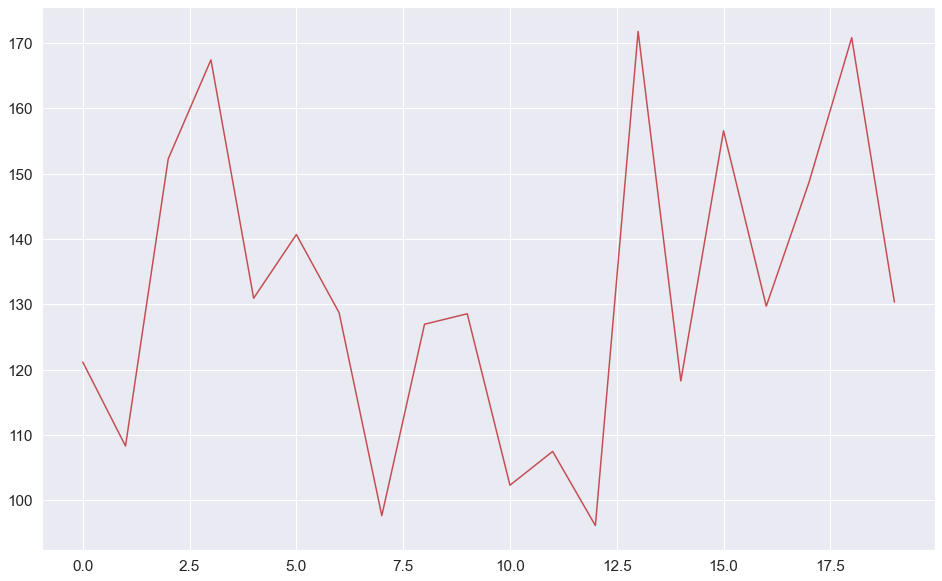

In [106]:
plt.figure(figsize=(16,10))

plt.plot('Strike Rate', 'r', data=kx)
plt.plot('Strike Rate', 'black', data=all_teams_batting_2020)
plt.plot('strike rate', 'g', data=kl_rahul_2020)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);
plt.xlim((0,19))
plt.legend(['KXIP Avg Strike Rate', 'Avg Strike Rate (All Teams)', 'KL Rahul\'s Strike Rate'], fontsize=14)
plt.title("Innings Progression comparison, KL Rahul - KXIP - All Teams, in IPL 2020")
plt.xlabel("Overs", fontsize=16)
plt.ylabel("Strike Rate", fontsize=16)

In [ ]:
all_teams_batting_2020 = deliveries_matches[deliveries_matches['date'].str.startswith('2020')]
all_teams_batting_2020['ball'] = 1

In [ ]:
all_teams_batting_2020 = all_teams_batting_2020.groupby(by='over').sum()
all_teams_batting_2020

In [ ]:
all_teams_batting_2020['Strike Rate'] = all_teams_batting_2020['batsman_runs']/all_teams_batting_2020['ball']*100
all_teams_batting_2020 = all_teams_batting_2020.round(decimals=2)
all_teams_batting_2020

In [ ]:
all_teams_batting_2019 = deliveries_matches[deliveries_matches['date'].str.startswith('2019')]
all_teams_batting_2019['ball'] = 1

all_teams_batting_2019 = all_teams_batting_2019.groupby(by='over').sum()

all_teams_batting_2019['Strike Rate'] = all_teams_batting_2019['batsman_runs']/all_teams_batting_2019['ball']*100
all_teams_batting_2019 = all_teams_batting_2019.round(decimals=2)
all_teams_batting_2019


In [ ]:
kx19 = new_batting.groupby(by='over').sum()
kx19['Strike Rate'] = kx19['batsman_runs']/kx19['ball']*100
kx19 = kx19.round(decimals=2)
kx19

In [ ]:
plt.figure(figsize=(16,10))

plt.plot('Strike Rate', 'r', data=kx19)
plt.plot('Strike Rate', 'black', data=all_teams_batting_2019)
plt.plot('strike rate', 'g', data=kl_rahul_2019)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);
plt.xlim((0,19))
plt.legend(['KXIP Avg Strike Rate', 'Avg Strike Rate (All Teams)', 'KL Rahul\'s Strike Rate'], fontsize=14)
plt.title("Innings Progression comparison, KL Rahul - KXIP - All Teams, in IPL 2019")
plt.xlabel("Overs", fontsize=16)
plt.ylabel("Strike Rate", fontsize=16)

In [ ]:
all_teams_batting_2018 = deliveries_matches[deliveries_matches['date'].str.startswith('2018')]
all_teams_batting_2018['ball'] = 1

all_teams_batting_2018 = all_teams_batting_2018.groupby(by='over').sum()

all_teams_batting_2018['Strike Rate'] = all_teams_batting_2018['batsman_runs']/all_teams_batting_2018['ball']*100
all_teams_batting_2018 = all_teams_batting_2018.round(decimals=2)
all_teams_batting_2018


In [ ]:
kx18 = new_batting.groupby(by='over').sum()
kx18['Strike Rate'] = kx18['batsman_runs']/kx18['ball']*100
kx18 = kx18.round(decimals=2)
kx18

In [ ]:
plt.figure(figsize=(16,10))

plt.plot('Strike Rate', 'r', data=kx18)
plt.plot('Strike Rate', 'black', data=all_teams_batting_2018)
plt.plot('strike rate', 'g', data=kl_rahul_2018)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);
plt.xlim((0,19))
plt.legend(['KXIP Avg Strike Rate', 'Avg Strike Rate (All Teams)', 'KL Rahul\'s Strike Rate'], fontsize=14)
plt.title("Innings Progression comparison, KL Rahul - KXIP - All Teams, in IPL 2018")
plt.xlabel("Overs", fontsize=16)
plt.ylabel("Strike Rate", fontsize=16)

In [ ]:
kl_rahul_2020

In [ ]:
batsmen_over_by_over
